In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Loading the Data

In [2]:
data_4 = pd.read_excel("Data Sets/Data Set 4.xlsx")
data_4.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                  41          880           129.0   
1    -122.22     37.86                  21         7099          1106.0   
2    -122.25     37.85                  52         1627           280.0   
3    -122.25     37.85                  52          919           213.0   
4    -122.25     37.84                  52         2535           489.0   

   population  households  median_income  median_house_value ocean_proximity  
0         322         126         8.3252              452600        NEAR BAY  
1        2401        1138         8.3014              358500        NEAR BAY  
2         565         259         3.8462              342200        NEAR BAY  
3         413         193         4.0368              269700        NEAR BAY  
4        1094         514         3.6591              299200        NEAR BAY

In [3]:
data_4.shape

(18565, 10)

In [4]:
data_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18565 entries, 0 to 18564
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           18565 non-null  float64
 1   latitude            18565 non-null  float64
 2   housing_median_age  18565 non-null  int64  
 3   total_rooms         18565 non-null  int64  
 4   total_bedrooms      18376 non-null  float64
 5   population          18565 non-null  int64  
 6   households          18565 non-null  int64  
 7   median_income       18565 non-null  float64
 8   median_house_value  18565 non-null  int64  
 9   ocean_proximity     18565 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.4+ MB


### Exploring the Data

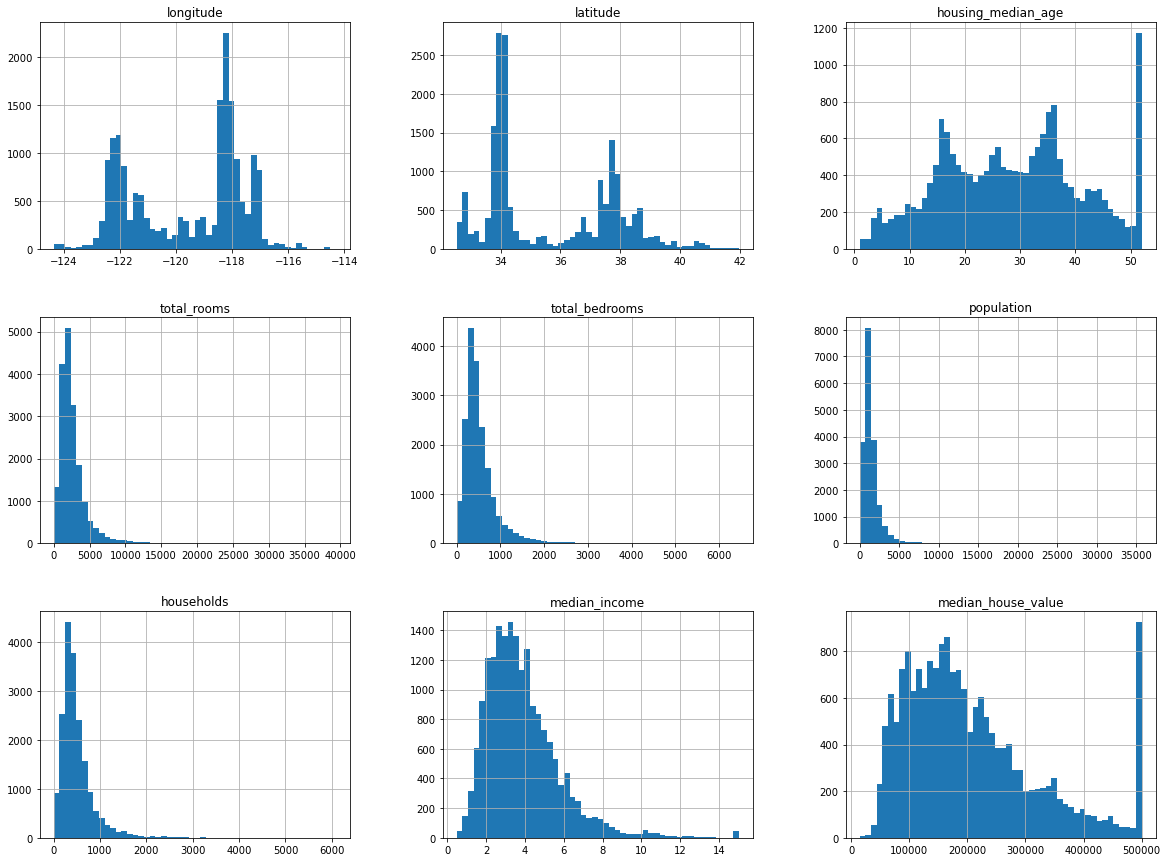

In [5]:
data_4.hist(bins = 50, figsize = (20,15))
plt.show()

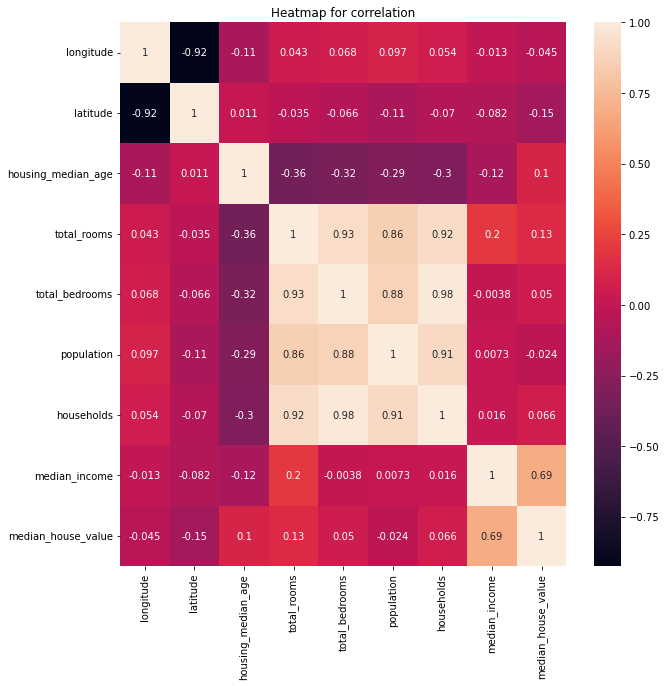

In [6]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(data_4.corr(),annot = True)
plt.title("Heatmap for correlation")
plt.show()

In [7]:
mean_households = data_4.loc[data_4.total_bedrooms.isnull()==False, 'households'].mean()
print("Mean Values of households is:", mean_households)
mean_bedrooms = data_4.loc[data_4.total_bedrooms.isnull()==False,'total_bedrooms'].mean()
print("Mean Value of bedrooms is:",mean_bedrooms)

Mean Values of households is: 499.3758707009142
Mean Value of bedrooms is: 537.7111993905094


In [8]:
data_4_non_null = data_4.copy(deep = True)
data_4_non_null.loc[data_4_non_null.total_bedrooms.isnull()==True,
                    'total_bedrooms'] = round(data_4_non_null.loc[data_4_non_null.total_bedrooms.isnull()==True,
                                                         'households']*mean_bedrooms/mean_households)

In [9]:
print(data_4.info())
print(data_4_non_null.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18565 entries, 0 to 18564
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           18565 non-null  float64
 1   latitude            18565 non-null  float64
 2   housing_median_age  18565 non-null  int64  
 3   total_rooms         18565 non-null  int64  
 4   total_bedrooms      18376 non-null  float64
 5   population          18565 non-null  int64  
 6   households          18565 non-null  int64  
 7   median_income       18565 non-null  float64
 8   median_house_value  18565 non-null  int64  
 9   ocean_proximity     18565 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.4+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18565 entries, 0 to 18564
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           1856

In [10]:
for i in range(len(data_4_non_null.columns)):
    print(data_4_non_null.iloc[:,i].value_counts(normalize = False).head(),"\n")

-118.31    151
-118.30    140
-118.32    132
-118.29    130
-118.27    130
Name: longitude, dtype: int64 

34.06    225
34.07    210
34.05    209
34.08    208
34.04    197
Name: latitude, dtype: int64 

52    1129
36     782
35     742
16     705
17     634
Name: housing_median_age, dtype: int64 

2127    16
1527    16
1613    15
1582    15
2053    15
Name: total_rooms, dtype: int64 

280.0    51
345.0    46
317.0    46
393.0    46
295.0    45
Name: total_bedrooms, dtype: int64 

891    24
761    23
825    23
999    22
850    21
Name: population, dtype: int64 

306    51
335    51
429    50
297    48
282    48
Name: households, dtype: int64 

3.1250     46
15.0001    44
4.1250     41
2.6250     39
3.8750     38
Name: median_income, dtype: int64 

500001    868
137500    112
162500    109
112500     97
187500     87
Name: median_house_value, dtype: int64 

<1H OCEAN     8188
INLAND        5921
NEAR OCEAN    2399
NEAR BAY      2052
ISLAND           5
Name: ocean_proximity, dtype: int64 


In [11]:
data_4_final = data_4_non_null.loc[data_4_non_null.median_house_value != max(data_4_non_null.median_house_value),:]

In [12]:
data_4_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17697 entries, 0 to 18564
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17697 non-null  float64
 1   latitude            17697 non-null  float64
 2   housing_median_age  17697 non-null  int64  
 3   total_rooms         17697 non-null  int64  
 4   total_bedrooms      17697 non-null  float64
 5   population          17697 non-null  int64  
 6   households          17697 non-null  int64  
 7   median_income       17697 non-null  float64
 8   median_house_value  17697 non-null  int64  
 9   ocean_proximity     17697 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.5+ MB


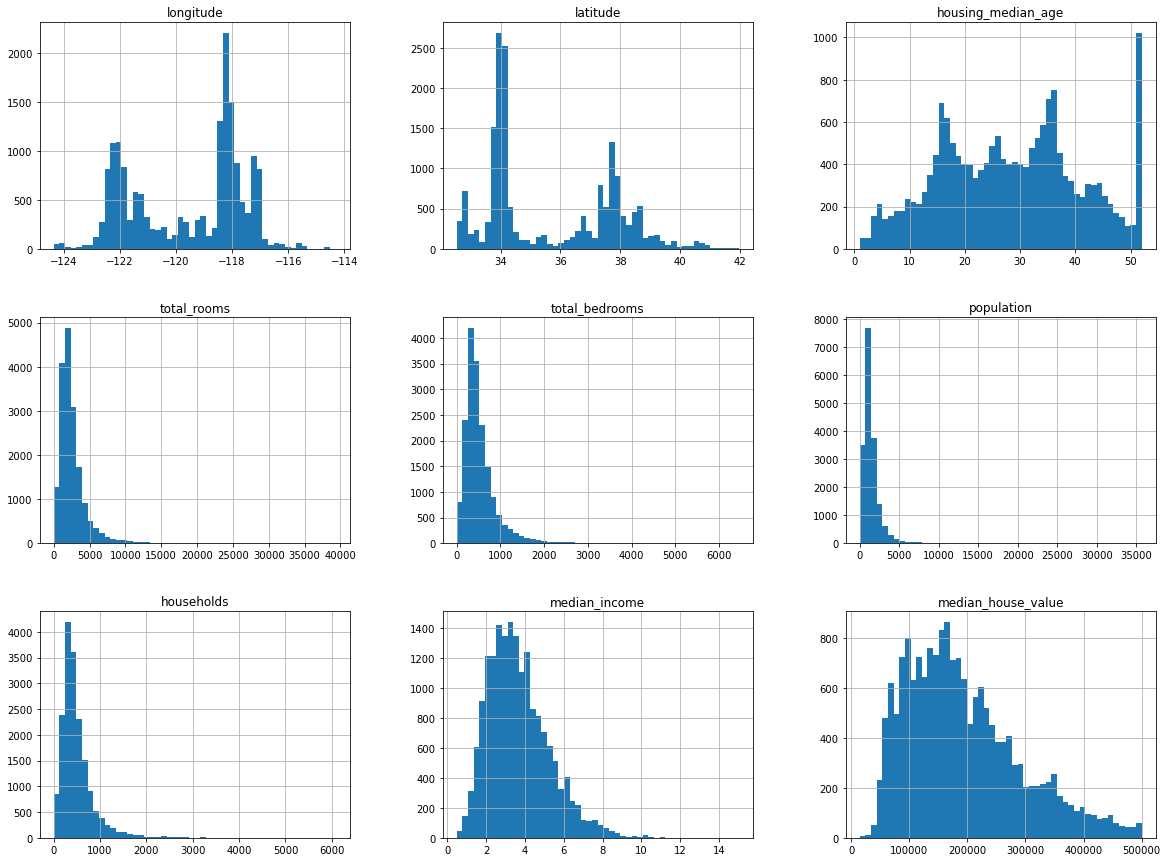

In [13]:
data_4_final.hist(bins = 50, figsize = (20,15))
plt.show()

### Data Preparation for Analytical Models:

#### Preparing data for Models
- Introducing the dummy variables to remove categorical data points
- Splitting the data into Train and Test Sets
- Standardize the X Variables

#### Running the models in following order

- Linear Regression
- Lasso Regression
- Decision Trees
- Ensemble Models
- Deep Neural Networks

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [15]:
data_final = pd.get_dummies(data_4_final, columns = data_4_final.select_dtypes('object').columns,
                           drop_first = True)

In [16]:
data_final.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                  41          880           129.0   
1    -122.22     37.86                  21         7099          1106.0   
2    -122.25     37.85                  52         1627           280.0   
3    -122.25     37.85                  52          919           213.0   
4    -122.25     37.84                  52         2535           489.0   

   population  households  median_income  median_house_value  \
0         322         126         8.3252              452600   
1        2401        1138         8.3014              358500   
2         565         259         3.8462              342200   
3         413         193         4.0368              269700   
4        1094         514         3.6591              299200   

   ocean_proximity_INLAND  ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
0                       0                       0                         1   
1                       0                       0                         1   
2                       0                       0                         1   
3                       0                       0                         1   
4                       0                       0                         1   

   ocean_proximity_NEAR OCEAN  
0                           0  
1                           0  
2                           0  
3                           0  
4                           0

In [17]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17697 entries, 0 to 18564
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   17697 non-null  float64
 1   latitude                    17697 non-null  float64
 2   housing_median_age          17697 non-null  int64  
 3   total_rooms                 17697 non-null  int64  
 4   total_bedrooms              17697 non-null  float64
 5   population                  17697 non-null  int64  
 6   households                  17697 non-null  int64  
 7   median_income               17697 non-null  float64
 8   median_house_value          17697 non-null  int64  
 9   ocean_proximity_INLAND      17697 non-null  uint8  
 10  ocean_proximity_ISLAND      17697 non-null  uint8  
 11  ocean_proximity_NEAR BAY    17697 non-null  uint8  
 12  ocean_proximity_NEAR OCEAN  17697 non-null  uint8  
dtypes: float64(4), int64(5), uint8(

In [18]:
x_variables = data_final.loc[:,data_final.columns != 'median_house_value']
y_variables = data_final.loc[:,data_final.columns == 'median_house_value']

In [19]:
x_variables.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                  41          880           129.0   
1    -122.22     37.86                  21         7099          1106.0   
2    -122.25     37.85                  52         1627           280.0   
3    -122.25     37.85                  52          919           213.0   
4    -122.25     37.84                  52         2535           489.0   

   population  households  median_income  ocean_proximity_INLAND  \
0         322         126         8.3252                       0   
1        2401        1138         8.3014                       0   
2         565         259         3.8462                       0   
3         413         193         4.0368                       0   
4        1094         514         3.6591                       0   

   ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
0                       0                         1   
1                       0                         1   
2                       0                         1   
3                       0                         1   
4                       0                         1   

   ocean_proximity_NEAR OCEAN  
0                           0  
1                           0  
2                           0  
3                           0  
4                           0

In [20]:
y_variables.head()

median_house_value
0              452600
1              358500
2              342200
3              269700
4              299200

In [21]:
X_train, X_test, y_train, y_test = train_test_split(x_variables, y_variables, test_size = 0.20, random_state = 1)

In [22]:
X_train_us = X_train.copy(deep = True)
X_test_us = X_test.copy(deep = True)
y_train_us = y_train.copy(deep = True)
y_test_us = y_test.copy(deep = True)

In [23]:
x_scaler = StandardScaler()

In [24]:
X_train.loc[:,
                   [col for col in X_train.columns 
                    if 'ocean_proximity' not in col]]= x_scaler.fit_transform(X_train.loc[:,
                                   [col for col in X_train.columns 
                                    if 'ocean_proximity' not in col ]])

In [25]:
X_train.describe().transpose()

count          mean       std       min  \
longitude                   14157.0 -2.214392e-15  1.000035 -2.387681   
latitude                    14157.0  4.035293e-16  1.000035 -1.446501   
housing_median_age          14157.0  6.223585e-17  1.000035 -2.192778   
total_rooms                 14157.0  2.158179e-17  1.000035 -1.180517   
total_bedrooms              14157.0  1.094146e-16  1.000035 -1.255110   
population                  14157.0  6.323966e-17  1.000035 -1.233388   
households                  14157.0 -2.710271e-17  1.000035 -1.284866   
median_income               14157.0 -3.011412e-17  1.000035 -2.035058   
ocean_proximity_INLAND      14157.0  3.340397e-01  0.471670  0.000000   
ocean_proximity_ISLAND      14157.0  2.119093e-04  0.014556  0.000000   
ocean_proximity_NEAR BAY    14157.0  1.072967e-01  0.309501  0.000000   
ocean_proximity_NEAR OCEAN  14157.0  1.231193e-01  0.328586  0.000000   

                                 25%       50%       75%        max  
longitude                  -1.096863  0.527874  0.782050   2.616108  
latitude                   -0.800553 -0.642551  0.965347   2.926426  
housing_median_age         -0.830361 -0.028939  0.692341   1.894474  
total_rooms                -0.535682 -0.233317  0.227215  16.536900  
total_bedrooms             -0.569967 -0.246039  0.255001  13.759778  
population                 -0.554472 -0.224859  0.256289  29.312698  
households                 -0.567968 -0.239069  0.269696  14.337840  
median_income              -0.736271 -0.143225  0.579038   6.095812  
ocean_proximity_INLAND      0.000000  0.000000  1.000000   1.000000  
ocean_proximity_ISLAND      0.000000  0.000000  0.000000   1.000000  
ocean_proximity_NEAR BAY    0.000000  0.000000  0.000000   1.000000  
ocean_proximity_NEAR OCEAN  0.000000  0.000000  0.000000   1.000000

In [26]:
X_test.loc[:,
                   [col for col in X_test.columns 
                    if 'ocean_proximity' not in col]]= x_scaler.fit_transform(X_test.loc[:,
                                   [col for col in X_test.columns 
                                    if 'ocean_proximity' not in col ]])

In [27]:
X_test.describe().transpose()

count          mean       std       min  \
longitude                   3540.0 -3.322891e-15  1.000141 -2.341622   
latitude                    3540.0  2.175786e-15  1.000141 -1.448145   
housing_median_age          3540.0  1.374920e-16  1.000141 -2.188676   
total_rooms                 3540.0  1.023663e-16  1.000141 -1.239126   
total_bedrooms              3540.0 -5.218675e-17  1.000141 -1.307702   
population                  3540.0  1.204310e-17  1.000141 -1.301677   
households                  3540.0 -1.806465e-17  1.000141 -1.334660   
median_income               3540.0  3.010774e-17  1.000141 -2.007323   
ocean_proximity_INLAND      3540.0  3.293785e-01  0.470054  0.000000   
ocean_proximity_ISLAND      3540.0  5.649718e-04  0.023766  0.000000   
ocean_proximity_NEAR BAY    3540.0  1.019774e-01  0.302661  0.000000   
ocean_proximity_NEAR OCEAN  3540.0  1.313559e-01  0.337837  0.000000   

                                 25%       50%       75%        max  
longitude                  -1.103965  0.513358  0.790613   2.499104  
latitude                   -0.800731 -0.637714  0.955202   2.930045  
housing_median_age         -0.832263 -0.034372  0.683729   1.880564  
total_rooms                -0.556852 -0.226487  0.225130  12.017580  
total_bedrooms             -0.580650 -0.241686  0.259391   8.949632  
population                 -0.585151 -0.240597  0.293142  12.433877  
households                 -0.584426 -0.234046  0.278308   9.690453  
median_income              -0.723343 -0.139015  0.595021   7.086919  
ocean_proximity_INLAND      0.000000  0.000000  1.000000   1.000000  
ocean_proximity_ISLAND      0.000000  0.000000  0.000000   1.000000  
ocean_proximity_NEAR BAY    0.000000  0.000000  0.000000   1.000000  
ocean_proximity_NEAR OCEAN  0.000000  0.000000  0.000000   1.000000

### Linear Regression

In [30]:
import statsmodels.api as sm

In [32]:
X_train_const = sm.add_constant(X_train)

In [37]:
model_1 = sm.OLS(y_train, X_train_const).fit()

In [39]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     1854.
Date:                Sat, 13 Aug 2022   Prob (F-statistic):               0.00
Time:                        18:10:44   Log-Likelihood:            -1.7598e+05
No. Observations:               14157   AIC:                         3.520e+05
Df Residuals:                   14144   BIC:                         3.521e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                       2.048e+05    902.874    226.807      0.000    2.03e+05    2.07e+05
longitude                  -4.849e+04   2140.518    -22.653      0.000   -5.27e+04   -4.43e+04
latitude                   -4.778e+04   2254.318    -21.194      0.000   -5.22e+04   -4.34e+04
housing_median_age          1.174e+04    595.273     19.722      0.000    1.06e+04    1.29e+04
total_rooms                -1.585e+04   1913.970     -8.279      0.000   -1.96e+04   -1.21e+04
total_bedrooms              3.796e+04   3060.117     12.405      0.000     3.2e+04     4.4e+04
population                 -3.299e+04   1276.291    -25.848      0.000   -3.55e+04   -3.05e+04
households                  1.588e+04   2936.798      5.408      0.000    1.01e+04    2.16e+04
median_income               5.992e+04    696.687     86.000      0.000    5.85e+04    6.13e+04
ocean_proximity_INLAND     -3.863e+04   1815.753    -21.277      0.000   -4.22e+04   -3.51e+04
ocean_proximity_ISLAND      1.725e+05    3.5e+04      4.928      0.000    1.04e+05    2.41e+05
ocean_proximity_NEAR BAY   -6470.5538   2045.988     -3.163      0.002   -1.05e+04   -2460.148
ocean_proximity_NEAR OCEAN  3875.0938   1695.205      2.286      0.022     552.269    7197.918
==============================================================================
Omnibus:                     3055.347   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9449.982
Skew:                           1.108   Prob(JB):                         0.00
Kurtosis:                       6.334   Cond. No.                         136.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

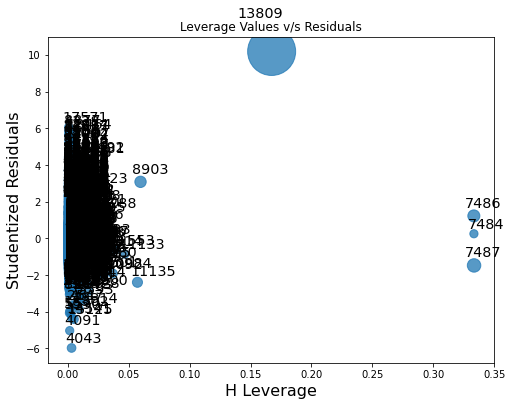

In [40]:
from statsmodels.graphics.regressionplots import influence_plot
fig,ax = plt.subplots(figsize = (8,6))
influence_plot(model_1, ax = ax)
plt.title("Leverage Values v/s Residuals")
plt.show()

In [41]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
model_reg = reg.fit(X_train,y_train)
model_reg.score(X_train,y_train)

0.6112916971440276

In [42]:
reg = LinearRegression(fit_intercept = True)
model_reg = reg.fit(X_train,y_train)
model_reg.score(X_train,y_train)

0.6112916971440276

MAE 45254.2040660488
MSE 3820382977.3324175
RMSE 61809.24669766181
R2 Score Test Data Set 0.6186636787630462
R2 Score Train Data Set 0.6112916971440276


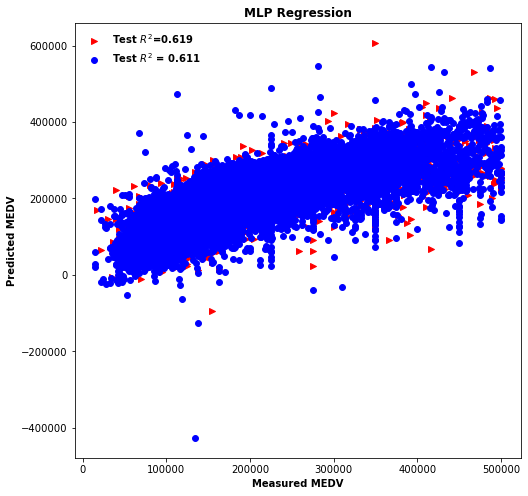

In [43]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
y_predict = model_reg.predict(X_test)
y_predict_train = model_reg.predict(X_train)
mae = mean_absolute_error(y_true = y_test, y_pred = model_reg.predict(X_test))
mse = mean_squared_error(y_true = y_test, y_pred = model_reg.predict(X_test))
rmse = mean_squared_error(y_true = y_test, y_pred = model_reg.predict(X_test), squared = False)

print("MAE", mae)
print("MSE", mse)
print("RMSE", rmse)
print("R2 Score Test Data Set", r2_score(y_test,y_predict))
print("R2 Score Train Data Set", r2_score(y_train,y_predict_train))

plt.figure(figsize = [8,8])
#plt.plot([0,-20000],[,4],color='black')
plt.scatter(y_test,model_reg.predict(X_test),
            s = 35, 
            color = 'red', 
            marker = '>', 
            label = 'Test $R^{2}$=''%.3f'%r2_score(y_test,y_predict),
           alpha = 1)

plt.scatter(y_train, y_predict_train,
           s = 35,
           color = 'blue',
           marker = 'o',
           label = 'Test $R^{2}$ = ''%0.3f'%r2_score(y_train, y_predict_train),
           alpha = 1)

#plt.xlim(0,60)
#plt.ylim(0,60)
plt.legend(frameon=False,prop={'weight':'bold'})
plt.xlabel('Measured MEDV',fontweight='bold')
plt.ylabel('Predicted MEDV',fontweight='bold')
plt.title('MLP Regression',fontweight='bold')
#plt.axis('square')


plt.show()

In [44]:
reg_results = pd.DataFrame([{'Model_Name':'OLS',
               'MAE': '{:,.0f}'.format(mae), 
               'MSE': '{:,.0f}'.format(mse),
               'RMSE': '{:,.0f}'.format(rmse),
              'R2_Train':'{:.2f}%'.format(r2_score(y_train,y_predict_train)*100),
              'R2_Test': '{:.2f}%'.format(r2_score(y_test,y_predict)*100)}])

#### Regularized Models
- Lasso
- Ridge
- Elastic Net

In [61]:
from sklearn.linear_model import Ridge
reg_ridge = Ridge(alpha = 2, max_iter = 5000)
reg_ridge.fit(X_train, y_train)

Ridge(alpha=2, max_iter=5000)

In [89]:
pd.DataFrame({'columns':X_train.columns, 'Coef':['{:,.2f}'.format(value) for value in reg_ridge.coef_[0]]
})

columns       Coef
0                    longitude  -48,397.6
1                     latitude  -47,700.7
2           housing_median_age   11,756.0
3                  total_rooms  -15,738.9
4               total_bedrooms   37,845.6
5                   population  -32,984.7
6                   households   15,886.8
7                median_income   59,879.8
8       ocean_proximity_INLAND  -38,695.3
9       ocean_proximity_ISLAND  103,497.0
10    ocean_proximity_NEAR BAY   -6,457.2
11  ocean_proximity_NEAR OCEAN    3,859.6

In [101]:
'{:,.2f}'.format(0)

'0.00'

In [46]:
y_predict = reg_ridge.predict(X_test)
y_predict_train = reg_ridge.predict(X_train)
mae = mean_absolute_error(y_true = y_test, y_pred = y_predict)
mse = mean_squared_error(y_true = y_test, y_pred = y_predict)
rmse = mean_squared_error(y_true = y_test, y_pred = y_predict, squared = False)

print("MAE Ridge:", mae)
print("MSE Ridge:", mse)
print("RMSE Ridge:", rmse)
print("R2 Score Test Data Set", r2_score(y_test,y_predict))
print("R2 Score Train Data Set", r2_score(y_train,y_predict_train))


MAE Ridge: 45257.59922832194
MSE Ridge: 3821996689.7708817
RMSE Ridge: 61822.29929217193
R2 Score Test Data Set 0.6185026040308873
R2 Score Train Data Set 0.6111845059989005


#### Hyperparameter tuning for the Ridge and Lasso Regressions

In [47]:
from sklearn.model_selection import GridSearchCV, cross_val_score

In [176]:
ridge = Ridge()
params = {'alpha':(np.logspace(-8,8,1000))}
gscv = GridSearchCV(ridge, params,cv=10)

In [177]:
gscv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': array([1.00000000e-08, 1.03756668e-08, 1.07654461e-08, 1.11698682e-08,
       1.15894830e-08, 1.20248614e-08, 1.24765955e-08, 1.29452998e-08,
       1.34316117e-08, 1.39361927e-08, 1.44597292e-08, 1.50029332e-08,
       1.55665436e-08, 1.61513269e-08, 1.67580786e-08, 1.73876240e-08,
       1.80408193e-08, 1.87185529e-08, 1.94217468e-08, 2...
       4.28185180e+07, 4.44270675e+07, 4.60960449e+07, 4.78277202e+07,
       4.96244488e+07, 5.14886745e+07, 5.34229330e+07, 5.54298552e+07,
       5.75121707e+07, 5.96727120e+07, 6.19144176e+07, 6.42403366e+07,
       6.66536327e+07, 6.91575883e+07, 7.17556092e+07, 7.44512291e+07,
       7.72481145e+07, 8.01500696e+07, 8.31610415e+07, 8.62851257e+07,
       8.95265713e+07, 9.28897872e+07, 9.63793480e+07, 1.00000000e+08])})

In [178]:
print(gscv.best_params_)
print(gscv.best_score_)

{'alpha': 0.2086024089248505}
0.6087317417000945


In [179]:
reg_ridge = Ridge(alpha = 0.2086024, max_iter = 5000)
reg_ridge.fit(X_train, y_train)
reg_ridge.score(X_train,y_train)

0.6112888674713397

In [180]:
y_predict = reg_ridge.predict(X_test)
y_predict_train = reg_ridge.predict(X_train)
mae = mean_absolute_error(y_true = y_test, y_pred = y_predict)
mse = mean_squared_error(y_true = y_test, y_pred = y_predict)
rmse = mean_squared_error(y_true = y_test, y_pred = y_predict, squared = False)

print("MAE Ridge:", mae)
print("MSE Ridge:", mse)
print("RMSE Ridge:", rmse)
print("R2 Score Test Data Set", r2_score(y_test,y_predict))
print("R2 Score Train Data Set", r2_score(y_train,y_predict_train))


MAE Ridge: 45254.80723306456
MSE Ridge: 3820267464.9383507
RMSE Ridge: 61808.31226411502
R2 Score Test Data Set 0.6186752087776213
R2 Score Train Data Set 0.6112888674713397


In [181]:
reg_results.loc[1] = ["RIDGE", 
                                           '{:,.0f}'.format(mae),
                                          '{:,.0f}'.format(mse),
                                          '{:,.0f}'.format(rmse),
                                          '{:,.2f}%'.format(r2_score(y_train,y_predict_train)*100),
                                          '{:,.2f}%'.format(r2_score(y_test,y_predict)*100)]

In [182]:
reg_results

Model_Name     MAE            MSE    RMSE R2_Train R2_Test
0        OLS  45,254  3,820,382,977  61,809   61.13%  61.87%
1      RIDGE  45,255  3,820,267,465  61,808   61.13%  61.87%

---------------------

In [91]:
from sklearn.linear_model import Lasso
lasso = Lasso()
params = {'alpha':(np.logspace(-8,8,100))}
gscv = GridSearchCV(lasso, params,cv=10)

In [184]:
gscv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': array([1.00000000e-08, 1.45082878e-08, 2.10490414e-08, 3.05385551e-08,
       4.43062146e-08, 6.42807312e-08, 9.32603347e-08, 1.35304777e-07,
       1.96304065e-07, 2.84803587e-07, 4.13201240e-07, 5.99484250e-07,
       8.69749003e-07, 1.26185688e-06, 1.83073828e-06, 2.65608778e-06,
       3.85352859e-06, 5.59081018e-06, 8.11130831e-06, 1...
       1.91791026e+04, 2.78255940e+04, 4.03701726e+04, 5.85702082e+04,
       8.49753436e+04, 1.23284674e+05, 1.78864953e+05, 2.59502421e+05,
       3.76493581e+05, 5.46227722e+05, 7.92482898e+05, 1.14975700e+06,
       1.66810054e+06, 2.42012826e+06, 3.51119173e+06, 5.09413801e+06,
       7.39072203e+06, 1.07226722e+07, 1.55567614e+07, 2.25701972e+07,
       3.27454916e+07, 4.75081016e+07, 6.89261210e+07, 1.00000000e+08])})

In [185]:
print(gscv.best_params_)
print(gscv.best_score_)

{'alpha': 0.572236765935022}
0.6087258370631455


In [92]:
reg_lasso = Lasso(alpha = 0.01, max_iter = 5000)
reg_lasso.fit(X_train, y_train)
reg_lasso.score(X_train,y_train)

0.6112916970928486

In [99]:
pd.DataFrame({'columns':X_train.columns, 'Coef':['{:,.2f}'.format(X) for X in reg_lasso.coef_]})

columns        Coef
0                    longitude  -48,488.57
1                     latitude  -47,777.72
2           housing_median_age   11,740.07
3                  total_rooms  -15,844.79
4               total_bedrooms   37,960.11
5                   population  -32,988.98
6                   households   15,881.50
7                median_income   59,915.00
8       ocean_proximity_INLAND  -38,633.66
9       ocean_proximity_ISLAND  172,479.55
10    ocean_proximity_NEAR BAY   -6,470.37
11  ocean_proximity_NEAR OCEAN    3,875.04

In [187]:
y_predict = reg_lasso.predict(X_test)
y_predict_train = reg_lasso.predict(X_train)

mse = mean_squared_error(y_true = y_test, y_pred = y_predict)
mae = mean_absolute_error(y_true = y_test, y_pred = y_predict)
rmse = mean_squared_error(y_true = y_test, y_pred = y_predict, squared = False)

print("MSE Lasso: ",mse)
print("MAE Lasso: ",mae)
print("RMSE Lasso: ",rmse)
print("R2 Train: ",r2_score(y_train, y_predict_train))
print("R2 Test: ",r2_score(y_test, y_predict))

MSE Lasso:  3820382590.0028615
MAE Lasso:  45254.20794337957
RMSE Lasso:  61809.24356439627
R2 Train:  0.6112916970928486
R2 Test:  0.618663717424832


In [188]:
reg_results.loc[2] = ["LASSO", 
                                           '{:,.0f}'.format(mae),
                                          '{:,.0f}'.format(mse),
                                          '{:,.0f}'.format(rmse),
                                          '{:,.2f}%'.format(r2_score(y_train,y_predict_train)*100),
                                          '{:,.2f}%'.format(r2_score(y_test,y_predict)*100)]

In [189]:
reg_results

Model_Name     MAE            MSE    RMSE R2_Train R2_Test
0        OLS  45,254  3,820,382,977  61,809   61.13%  61.87%
1      RIDGE  45,255  3,820,267,465  61,808   61.13%  61.87%
2      LASSO  45,254  3,820,382,590  61,809   61.13%  61.87%

In [190]:
coef_df = pd.DataFrame({'Params': X_train.columns.tolist(), 
                        'OLS': ['{:,.2f}'.format(elem) for elem in model_reg.coef_.flatten()], 
                        'Ridge': ['{:,.2f}'.format(elem) for elem in reg_ridge.coef_.flatten()],
                       'Lasso':['{:,.2f}'.format(elem) for elem in reg_lasso.coef_.flatten()]})

In [191]:
coef_df

Params         OLS       Ridge       Lasso
0                    longitude  -48,488.73  -48,484.90  -48,488.57
1                     latitude  -47,777.86  -47,776.28  -47,777.72
2           housing_median_age   11,740.07   11,742.61   11,740.07
3                  total_rooms  -15,845.03  -15,832.29  -15,844.79
4               total_bedrooms   37,960.31   37,952.49   37,960.11
5                   population  -32,989.04  -32,989.63  -32,988.98
6                   households   15,881.60   15,877.13   15,881.50
7                median_income   59,915.06   59,910.48   59,915.00
8       ocean_proximity_INLAND  -38,633.57  -38,638.71  -38,633.66
9       ocean_proximity_ISLAND  172,526.72  161,300.08  172,479.55
10    ocean_proximity_NEAR BAY   -6,470.55   -6,471.84   -6,470.37
11  ocean_proximity_NEAR OCEAN    3,875.09    3,870.29    3,875.04

#### KNN Regression

In [192]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [193]:
knn = KNeighborsRegressor(n_neighbors = 4).fit(X_train, y_train)
print("R2 Value for Train", r2_score(y_train,knn.predict(X_train)))
print("R2 Value for Test", r2_score(y_test,knn.predict(X_test)))

R2 Value for Train 0.8032958067997806
R2 Value for Test 0.6648370449552801


MAE 39560.32485875706
MSE 3357799340.833404
RMSE 57946.52138682187
R2 Score Test Data Set 0.6648370449552801
R2 Score Train Data Set 0.8032958067997806


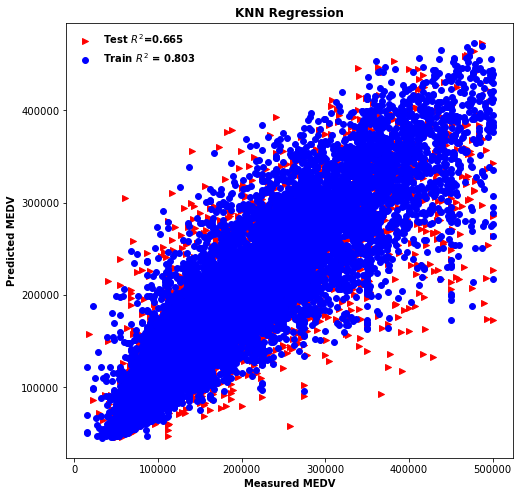

In [194]:
y_predict = knn.predict(X_test)
y_predict_train = knn.predict(X_train)
mae = mean_absolute_error(y_true = y_test, y_pred = knn.predict(X_test))
mse = mean_squared_error(y_true = y_test, y_pred = knn.predict(X_test))
rmse = mean_squared_error(y_true = y_test, y_pred = knn.predict(X_test), squared = False)

print("MAE", mae)
print("MSE", mse)
print("RMSE", rmse)
print("R2 Score Test Data Set", r2_score(y_test,y_predict))
print("R2 Score Train Data Set", r2_score(y_train,y_predict_train))

plt.figure(figsize = [8,8])

plt.scatter(y_test,knn.predict(X_test),
            s = 35, 
            color = 'red', 
            marker = '>', 
            label = 'Test $R^{2}$=''%.3f'%r2_score(y_test,y_predict),
           alpha = 1)

plt.scatter(y_train, y_predict_train,
           s = 35,
           color = 'blue',
           marker = 'o',
           label = 'Train $R^{2}$ = ''%0.3f'%r2_score(y_train, y_predict_train),
           alpha = 1)

#plt.xlim(0,60)
#plt.ylim(0,60)
plt.legend(frameon=False,prop={'weight':'bold'})
plt.xlabel('Measured MEDV',fontweight='bold')
plt.ylabel('Predicted MEDV',fontweight='bold')
plt.title('KNN Regression',fontweight='bold')
#plt.axis('square')


plt.show()

In [195]:
consolidated_results = reg_results.copy(deep = True)

In [196]:
consolidated_results

Model_Name     MAE            MSE    RMSE R2_Train R2_Test
0        OLS  45,254  3,820,382,977  61,809   61.13%  61.87%
1      RIDGE  45,255  3,820,267,465  61,808   61.13%  61.87%
2      LASSO  45,254  3,820,382,590  61,809   61.13%  61.87%

##### Grid Search for KNN Regressor

In [197]:
tuned_parameters = [{'n_neighbors':range(3,10),
                    'metric':['canberra','euclidean','minkowski']}]

reg_knn = GridSearchCV(KNeighborsRegressor(),
                      tuned_parameters,
                      cv = 10,
                      scoring = 'r2')

reg_knn.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid=[{'metric': ['canberra', 'euclidean', 'minkowski'],
                          'n_neighbors': range(3, 10)}],
             scoring='r2')

In [198]:
print(reg_knn.best_params_)
print(reg_knn.best_score_)

{'metric': 'euclidean', 'n_neighbors': 9}
0.6824815431505133


In [199]:
tuned_knn = KNeighborsRegressor(n_neighbors = 9, metric = 'euclidean')
tuned_knn.fit(X_train,y_train)

KNeighborsRegressor(metric='euclidean', n_neighbors=9)

MAE 38523.76340238544
MSE 3147722040.152773
RMSE 56104.56345211834
R2 Score Test Data Set 0.6858061743572956
R2 Score Train Data Set 0.7512671639224395


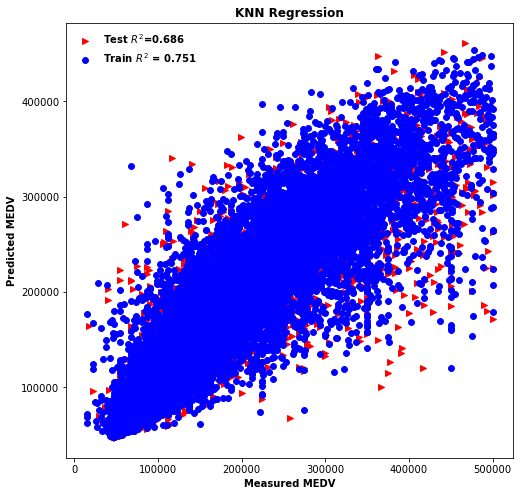

In [200]:
y_predict = tuned_knn.predict(X_test)
y_predict_train = tuned_knn.predict(X_train)
mae = mean_absolute_error(y_true = y_test, y_pred = tuned_knn.predict(X_test))
mse = mean_squared_error(y_true = y_test, y_pred = tuned_knn.predict(X_test))
rmse = mean_squared_error(y_true = y_test, y_pred = tuned_knn.predict(X_test), squared = False)

print("MAE", mae)
print("MSE", mse)
print("RMSE", rmse)
print("R2 Score Test Data Set", r2_score(y_test,y_predict))
print("R2 Score Train Data Set", r2_score(y_train,y_predict_train))

plt.figure(figsize = [8,8])

plt.scatter(y_test,tuned_knn.predict(X_test),
            s = 35, 
            color = 'red', 
            marker = '>', 
            label = 'Test $R^{2}$=''%.3f'%r2_score(y_test,y_predict),
           alpha = 1)

plt.scatter(y_train, y_predict_train,
           s = 35,
           color = 'blue',
           marker = 'o',
           label = 'Train $R^{2}$ = ''%0.3f'%r2_score(y_train, y_predict_train),
           alpha = 1)

#plt.xlim(0,60)
#plt.ylim(0,60)
plt.legend(frameon=False,prop={'weight':'bold'})
plt.xlabel('Measured MEDV',fontweight='bold')
plt.ylabel('Predicted MEDV',fontweight='bold')
plt.title('KNN Regression',fontweight='bold')
#plt.axis('square')


plt.show()

In [201]:
consolidated_results.loc[3] = ['KNN Regressor', '{:,.0f}'.format(mae),
                                          '{:,.0f}'.format(mse),
                                          '{:,.0f}'.format(rmse),
                                          '{:,.2f}%'.format(r2_score(y_train,y_predict_train)*100),
                                          '{:,.2f}%'.format(r2_score(y_test,y_predict)*100)]

In [202]:
consolidated_results

Model_Name     MAE            MSE    RMSE R2_Train R2_Test
0            OLS  45,254  3,820,382,977  61,809   61.13%  61.87%
1          RIDGE  45,255  3,820,267,465  61,808   61.13%  61.87%
2          LASSO  45,254  3,820,382,590  61,809   61.13%  61.87%
3  KNN Regressor  38,524  3,147,722,040  56,105   75.13%  68.58%

### Tree based Models

#### Decision Tree Regression

In [48]:
from sklearn.tree import DecisionTreeRegressor
reg_dtree = DecisionTreeRegressor(random_state = 1 , max_depth = 6)
reg_dtree.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=6, random_state=1)

In [49]:
r2_score(y_train, reg_dtree.predict(X_train))

0.647311418313194

In [50]:
reg_dtree.fit(X_train_us,y_train_us)
r2_score(y_train_us, reg_dtree.predict(X_train_us))

0.647311418313194

In [148]:
reg_dtree.feature_importances_[1]

0.0465136741637758

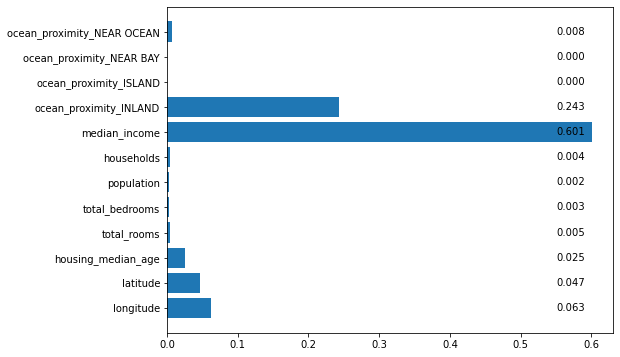

In [155]:
plt.figure(figsize = [8,6])
plt.barh(X_train.columns, reg_dtree.feature_importances_,label =reg_dtree.feature_importances_ )
for i in range(len(X_train.columns)):
    plt.annotate(str('{:,.3f}'.format(reg_dtree.feature_importances_[i])),xy = (0.55,-0.1+i*1))
plt.show()

In [54]:
reg_dtree.feature_importances_

array([0.06276233, 0.04651367, 0.02468071, 0.00457922, 0.00298189,
       0.00210647, 0.00426734, 0.60124409, 0.24319878, 0.        ,
       0.        , 0.00766548])

In [55]:
X_train.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity_INLAND', 'ocean_proximity_ISLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN'],
      dtype='object')

The values for r2 do not change between scaled and unscaled versions therefore we will be working with the, unscaled data. 

In [206]:
y_predict = reg_dtree.predict(X_test_us)
y_predict_train = reg_dtree.predict(X_train_us)
mae = mean_absolute_error(y_true = y_test_us, y_pred = y_predict)
mse = mean_squared_error(y_true = y_test_us, y_pred = y_predict)
rmse = mean_squared_error(y_true = y_test_us, y_pred = y_predict, squared = False)

print("MAE", mae)
print("MSE", mse)
print("RMSE", rmse)
print("R2 Score Test Data Set", r2_score(y_test_us,y_predict))
print("R2 Score Train Data Set", r2_score(y_train_us,y_predict_train))

MAE 44214.08272685373
MSE 3779457497.4060526
RMSE 61477.29253477297
R2 Score Test Data Set 0.6227487069009514
R2 Score Train Data Set 0.647311418313194


##### Gridsearch for Decision Tree

In [207]:
tuned_parameters = [{'max_depth':range(2,30)}]

In [208]:
dtr = GridSearchCV(DecisionTreeRegressor(),
                  tuned_parameters,
                  cv = 10,
                  scoring = 'r2')
dtr.fit(X_train_us, y_train_us)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid=[{'max_depth': range(2, 30)}], scoring='r2')

In [209]:
print(dtr.best_params_)
print(dtr.best_score_)

{'max_depth': 9}
0.6630745325018215


In [168]:
dtr_f = DecisionTreeRegressor(max_depth = 9,random_state = 1)
dtr_f.fit(X_train_us, y_train_us)

DecisionTreeRegressor(max_depth=9, random_state=1)

In [170]:
y_predict = dtr_f.predict(X_test_us)
y_predict_train = dtr_f.predict(X_train_us)

mse = mean_squared_error(y_true = y_test_us, y_pred = y_predict)
mae = mean_absolute_error(y_true = y_test_us, y_pred = y_predict)
rmse = mean_squared_error(y_true = y_test_us, y_pred = y_predict, squared=False)
r2_test = r2_score(y_true = y_test_us, y_pred = y_predict)
r2_train = r2_score(y_true = y_train_us, y_pred = y_predict_train)

print("MSE:", mse)
print("MAE:",mae)
print("rmse", rmse)
print("R2 Train",r2_train)
print("R2 Test",r2_test)

MSE: 3461959346.5794754
MAE: 40501.1479173747
rmse 58838.417267797704
R2 Train 0.7630840513645432
R2 Test 0.6544401832670936


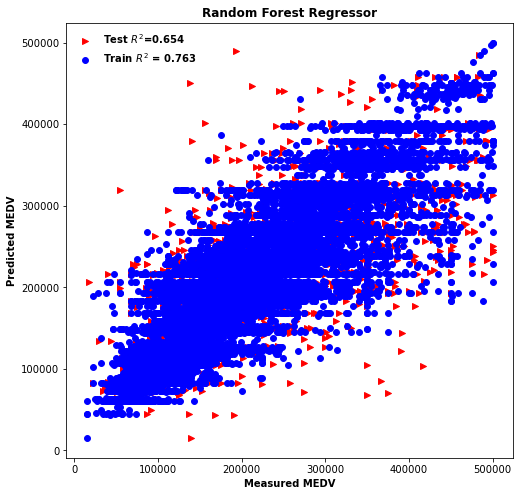

In [172]:
plt.figure(figsize = [8,8])

plt.scatter(y_test_us,dtr_f.predict(X_test_us),
            s = 35, 
            color = 'red', 
            marker = '>', 
            label = 'Test $R^{2}$=''%.3f'%r2_score(y_test_us,y_predict),
           alpha = 1)

plt.scatter(y_train_us, y_predict_train,
           s = 35,
           color = 'blue',
           marker = 'o',
           label = 'Train $R^{2}$ = ''%0.3f'%r2_score(y_train_us, y_predict_train),
           alpha = 1)

#plt.xlim(0,60)
#plt.ylim(0,60)
plt.legend(frameon=False,prop={'weight':'bold'})
plt.xlabel('Measured MEDV',fontweight='bold')
plt.ylabel('Predicted MEDV',fontweight='bold')
plt.title('Random Forest Regressor',fontweight='bold')
#plt.axis('square')


plt.show()

In [212]:
consolidated_results

Model_Name     MAE            MSE    RMSE R2_Train R2_Test
0            OLS  45,254  3,820,382,977  61,809   61.13%  61.87%
1          RIDGE  45,255  3,820,267,465  61,808   61.13%  61.87%
2          LASSO  45,254  3,820,382,590  61,809   61.13%  61.87%
3  KNN Regressor  38,524  3,147,722,040  56,105   75.13%  68.58%

In [213]:
consolidated_results.loc[4] = ["Decision Tree Regressor",
                              '{:,.0f}'.format(mae),
                              '{:,.0f}'.format(mse),
                              '{:,.0f}'.format(rmse),
                              '{:,.2f}%'.format(r2_train*100),
                              '{:,.2f}%'.format(r2_test*100)]

In [214]:
consolidated_results

Model_Name     MAE            MSE    RMSE R2_Train R2_Test
0                      OLS  45,254  3,820,382,977  61,809   61.13%  61.87%
1                    RIDGE  45,255  3,820,267,465  61,808   61.13%  61.87%
2                    LASSO  45,254  3,820,382,590  61,809   61.13%  61.87%
3            KNN Regressor  38,524  3,147,722,040  56,105   75.13%  68.58%
4  Decision Tree Regressor  40,501  3,461,959,347  58,838   76.31%  65.44%

### Ensemble Models
#### Random Forest Regression

In [107]:
from sklearn.ensemble import RandomForestRegressor

In [216]:
rfr = RandomForestRegressor(max_depth = 3).fit(X_train_us, y_train_us.values.ravel())

In [217]:
y_predict = rfr.predict(X_test_us)
y_predict_train = rfr.predict(X_train_us)

mae = mean_absolute_error(y_true = y_predict, y_pred = y_test_us)
mse = mean_squared_error(y_true = y_predict, y_pred = y_test_us)
rmse = mean_squared_error(y_true = y_predict, y_pred = y_test_us, squared=False)
r2_train = r2_score(y_train_us, y_predict_train)
r2_test = r2_score(y_test_us, y_predict)

print("MSE:", mse)
print("MAE:",mae)
print("rmse", rmse)
print("R2 Train",r2_train)
print("R2 Test",r2_test)

MSE: 4627931805.7146845
MAE: 50240.467005841216
rmse 68028.90419310519
R2 Train 0.5440091145422914
R2 Test 0.5380571790320872


#### Grid Search on the Random Forest Regressor

In [218]:
tuned_parameters = {'max_depth':[2,30],
                   'n_estimators': [10,20,30],
                   'max_features':[1,'sqrt','log2'],
                   'bootstrap':['False','True']}

RFR = GridSearchCV(RandomForestRegressor(),
                  tuned_parameters,
                  cv = 10,
                  scoring = 'r2')
RFR.fit(X_train_us, y_train_us.values.ravel())

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': ['False', 'True'], 'max_depth': [2, 30],
                         'max_features': [1, 'sqrt', 'log2'],
                         'n_estimators': [10, 20, 30]},
             scoring='r2')

In [219]:
print(RFR.best_params_)
print(RFR.best_score_)

{'bootstrap': 'False', 'max_depth': 30, 'max_features': 'sqrt', 'n_estimators': 30}
0.7738204371976606


In [220]:
y_predict = RFR.predict(X_test_us)
y_predict_train = RFR.predict(X_train_us)

mae = mean_absolute_error(y_true = y_predict, y_pred = y_test_us)
mse = mean_squared_error(y_true = y_predict, y_pred = y_test_us)
rmse = mean_squared_error(y_true = y_predict, y_pred = y_test_us, squared=False)
r2_train = r2_score(y_train_us, y_predict_train)
r2_test = r2_score(y_test_us, y_predict)

print("MSE:", mse)
print("MAE:",mae)
print("rmse", rmse)
print("R2 Train",r2_train)
print("R2 Test",r2_test)

MSE: 2355776953.274994
MAE: 32901.44545757705
rmse 48536.34672361522
R2 Train 0.96487807666913
R2 Test 0.7648551670482121


In [108]:
RFR_Final = RandomForestRegressor(bootstrap = False, 
                                 max_depth = 30,
                                 max_features = 'sqrt',
                                 n_estimators = 30)

In [111]:
RFR_Final.fit(X_train, y_train.values.ravel())

RandomForestRegressor(bootstrap=False, max_depth=30, max_features='sqrt',
                      n_estimators=30)

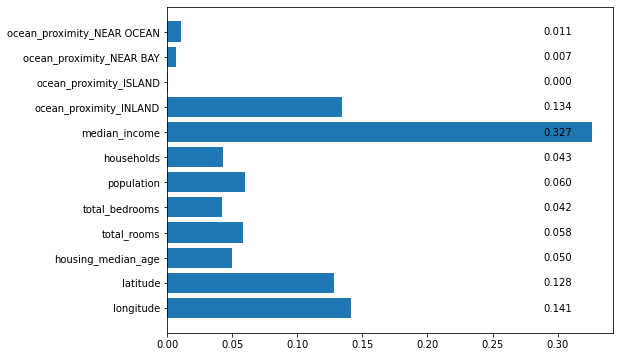

In [144]:
plt.figure(figsize = [8,6])
plt.barh(X_train.columns, RFR_Final.feature_importances_)
for i in range(len(X_train.columns)):
    plt.annotate(str('{:,.3f}'.format(RFR_Final.feature_importances_[i])),xy=(0.3,-0.2+i*1),ha='center',va = 'bottom')
plt.show()

In [109]:
plt.figure(figsize = [8,8])

plt.scatter(y_test_us,RFR.predict(X_test_us),
            s = 35, 
            color = 'red', 
            marker = '>', 
            label = 'Test $R^{2}$=''%.3f'%r2_score(y_test_us,y_predict),
           alpha = 1)

plt.scatter(y_train_us, y_predict_train,
           s = 35,
           color = 'blue',
           marker = 'o',
           label = 'Train $R^{2}$ = ''%0.3f'%r2_score(y_train_us, y_predict_train),
           alpha = 1)

#plt.xlim(0,60)
#plt.ylim(0,60)
plt.legend(frameon=False,prop={'weight':'bold'})
plt.xlabel('Measured MEDV',fontweight='bold')
plt.ylabel('Predicted MEDV',fontweight='bold')
plt.title('Random Forest Regressor',fontweight='bold')
#plt.axis('square')


plt.show()

NameError: name 'RFR' is not defined

<Figure size 576x576 with 0 Axes>

In [222]:
consolidated_results

Model_Name     MAE            MSE    RMSE R2_Train R2_Test
0                      OLS  45,254  3,820,382,977  61,809   61.13%  61.87%
1                    RIDGE  45,255  3,820,267,465  61,808   61.13%  61.87%
2                    LASSO  45,254  3,820,382,590  61,809   61.13%  61.87%
3            KNN Regressor  38,524  3,147,722,040  56,105   75.13%  68.58%
4  Decision Tree Regressor  40,501  3,461,959,347  58,838   76.31%  65.44%

In [223]:
consolidated_results.loc[5] = ["Random Forest Regressor",
                              '{:,.0f}'.format(mae),
                              '{:,.0f}'.format(mse),
                              '{:,.0f}'.format(rmse),
                              '{:,.2f}%'.format(r2_train*100),
                              '{:,.2f}%'.format(r2_test*100)]

In [224]:
consolidated_results

Model_Name     MAE            MSE    RMSE R2_Train R2_Test
0                      OLS  45,254  3,820,382,977  61,809   61.13%  61.87%
1                    RIDGE  45,255  3,820,267,465  61,808   61.13%  61.87%
2                    LASSO  45,254  3,820,382,590  61,809   61.13%  61.87%
3            KNN Regressor  38,524  3,147,722,040  56,105   75.13%  68.58%
4  Decision Tree Regressor  40,501  3,461,959,347  58,838   76.31%  65.44%
5  Random Forest Regressor  32,901  2,355,776,953  48,536   96.49%  76.49%

### Gradient Boosting

In [156]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators = 400,
                               verbose = 1).fit(X_train, y_train.values.ravel())

      Iter       Train Loss   Remaining Time 
         1  8482783311.6918           10.39s
         2  7710891869.2229           10.11s
         3  7075404604.9325           10.02s
         4  6558059273.1146            9.94s
         5  6128865354.5774            9.87s
         6  5765485652.1963            9.80s
         7  5467661336.4870            9.78s
         8  5217233505.4353            9.75s
         9  5005221618.5774            9.72s
        10  4826659600.0942            9.70s
        20  3898466321.8402            9.41s
        30  3425386701.7860            9.09s
        40  3121456047.4324            8.81s
        50  2909218868.3933            8.55s
        60  2786748795.2424            8.29s
        70  2678088725.5018            8.04s
        80  2567930627.5689            7.79s
        90  2451845946.7762            7.54s
       100  2361877896.4733            7.29s
       200  1921007849.2645            4.84s
       300  1709744253.5549            2.42s
       40

In [226]:
print(r2_score(y_test, gbr.predict(X_test)))
print(r2_score(y_train,gbr.predict(X_train)))

0.771561950507526
0.8330860583588625


In [227]:
gbr = GradientBoostingRegressor(n_estimators = 400,
                               verbose = 1).fit(X_train_us, y_train_us.values.ravel())
print(r2_score(y_test_us, gbr.predict(X_test_us)))
print(r2_score(y_train_us,gbr.predict(X_train_us)))

      Iter       Train Loss   Remaining Time 
         1  8482783311.6918            9.75s
         2  7710891869.2229            9.71s
         3  7075404604.9325            9.69s
         4  6558059273.1146            9.68s
         5  6128865354.5774            9.67s
         6  5765485652.1963            9.67s
         7  5467661336.4870            9.64s
         8  5217233505.4353            9.60s
         9  5005221618.5774            9.56s
        10  4826659600.0942            9.53s
        20  3898466321.8402            9.23s
        30  3425386701.7860            8.91s
        40  3121456047.4324            8.64s
        50  2909218868.3933            8.39s
        60  2786748795.2424            8.15s
        70  2678088725.5018            7.91s
        80  2567930627.5689            7.66s
        90  2451845946.7762            7.42s
       100  2361877896.4733            7.18s
       200  1921007849.2645            4.76s
       300  1709744253.5549            2.38s
       40

Again just like random forest and decision tree scaled and un-scaled variables give the same results therefore we can use unscaled input variables. This holds true in general for the Tree based algorithms.

In [228]:
y_predict = gbr.predict(X_test_us)
y_predict_train = gbr.predict(X_train_us)

mae = mean_absolute_error(y_true = y_predict, y_pred = y_test_us)
mse = mean_squared_error(y_true = y_predict, y_pred = y_test_us)
rmse = mean_squared_error(y_true = y_predict, y_pred = y_test_us, squared=False)
r2_train = r2_score(y_train_us, y_predict_train)
r2_test = r2_score(y_test_us, y_predict)

print("MSE:", mse)
print("MAE:",mae)
print("rmse", rmse)
print("R2 Train",r2_train)
print("R2 Test",r2_test)

MSE: 2133836667.7167814
MAE: 31452.83354445308
rmse 46193.46996834922
R2 Train 0.8330860583588626
R2 Test 0.7870084151731275


In [229]:
tuned_parameters = [{'n_estimators':[300,500],
                    'criterion':['friedman_mse','squared_error',],
                    'max_features':[1,'sqrt','log2'],
                    'max_depth':[2,10],
                    'verbose':[1]}]

GBR = GridSearchCV(GradientBoostingRegressor(),
                  tuned_parameters,
                  cv = 10,
                  scoring = 'r2')

GBR.fit(X_train_us, y_train_us.values.ravel())

      Iter       Train Loss   Remaining Time 
         1  9383294390.6817            0.56s
         2  8897530446.9232            0.48s
         3  8830199580.6006            0.48s
         4  8699445075.8197            0.46s
         5  8360541270.2327            0.46s
         6  8011966098.0278            0.51s
         7  7574158293.5829            0.54s
         8  7550496352.3583            0.56s
         9  7389656048.2087            0.56s
        10  7329636840.7805            0.54s
        20  5786284872.0193            0.51s
        30  5050058621.3739            0.50s
        40  4565195453.8610            0.49s
        50  4259890005.5868            0.47s
        60  4206398097.2137            0.43s
        70  4048138392.0307            0.41s
        80  3893341287.0433            0.39s
        90  3722088195.4666            0.38s
       100  3548497443.9813            0.36s
       200  3049534132.3930            0.17s
       300  2768273389.1071            0.00s
      Ite

         9  8107723976.4944            0.51s
        10  8024041788.6742            0.52s
        20  6992458873.2589            0.49s
        30  6245919037.2609            0.46s
        40  5562649418.0453            0.44s
        50  4919492421.6034            0.44s
        60  4548608353.5526            0.43s
        70  4296593204.2183            0.41s
        80  4080595414.6068            0.40s
        90  3917184624.5005            0.38s
       100  3707523163.3449            0.37s
       200  3053494535.4512            0.18s
       300  2813764673.0849            0.00s
      Iter       Train Loss   Remaining Time 
         1  9342049834.4522            0.30s
         2  9235877296.2359            0.37s
         3  9221509649.2615            0.40s
         4  8763583082.3260            0.41s
         5  8726192461.2038            0.44s
         6  8670537695.9223            0.51s
         7  8117867149.3175            0.53s
         8  7904796131.5671            0.54s
         

        20  6347319390.7375            0.84s
        30  5438685014.8756            0.85s
        40  4905045723.1701            0.82s
        50  4455402117.3960            0.82s
        60  4226458743.0732            0.79s
        70  3987134531.4600            0.77s
        80  3793612028.5172            0.76s
        90  3707099665.9614            0.73s
       100  3612709499.1955            0.71s
       200  3086222922.7821            0.53s
       300  2833929009.6811            0.36s
       400  2657546972.7910            0.18s
       500  2526350415.3102            0.00s
      Iter       Train Loss   Remaining Time 
         1  8900951222.4731            1.43s
         2  8501071549.7747            1.16s
         3  8134311580.4129            1.21s
         4  8101040887.0080            0.97s
         5  7903651720.7685            1.03s
         6  7623507384.4869            1.06s
         7  7580077849.2002            1.04s
         8  7519404487.8995            0.97s
         

        50  3698283237.2067            1.06s
        60  3542545655.8765            1.03s
        70  3408625859.7293            0.97s
        80  3297817574.9594            0.93s
        90  3216888487.0744            0.88s
       100  3140156329.9372            0.83s
       200  2684704868.7659            0.41s
       300  2471899650.7484            0.00s
      Iter       Train Loss   Remaining Time 
         1  8829166634.5187            1.61s
         2  8447075647.5613            1.56s
         3  7865844557.0316            1.42s
         4  7760268939.7581            1.27s
         5  7710035067.1689            1.16s
         6  7605986314.4545            1.16s
         7  7253889942.9482            1.19s
         8  6900469581.8747            1.23s
         9  6637880216.3237            1.21s
        10  6300742434.5064            1.18s
        20  4959221912.3072            1.15s
        30  4310161897.4792            1.10s
        40  3937050073.6613            1.05s
        5

       200  2634674171.8029            1.22s
       300  2431398976.9199            0.81s
       400  2289764219.7217            0.40s
       500  2199113905.8374            0.00s
      Iter       Train Loss   Remaining Time 
         1  8991139862.2482            1.46s
         2  8704119287.6128            1.72s
         3  8308156679.9919            1.78s
         4  7852160781.4316            1.88s
         5  7628140666.3309            2.00s
         6  7143826446.6476            2.12s
         7  6856459207.8595            2.18s
         8  6682635681.0147            2.11s
         9  6405265045.0674            2.12s
        10  6341899551.2824            2.11s
        20  4943806544.4195            2.03s
        30  4392738588.2199            1.93s
        40  4008769418.5803            1.82s
        50  3719109407.7782            1.84s
        60  3531773029.0991            1.84s
        70  3392390503.6964            1.79s
        80  3302964094.3538            1.75s
        9

        50  3746791547.7691            1.01s
        60  3542647698.8451            0.95s
        70  3420070921.7820            0.91s
        80  3281664199.0398            0.88s
        90  3158202569.4160            0.84s
       100  3066133840.3193            0.81s
       200  2620142792.0098            0.40s
       300  2414999106.9951            0.00s
      Iter       Train Loss   Remaining Time 
         1  8987521099.3015            1.03s
         2  8601743400.6615            1.27s
         3  7957553119.1125            1.23s
         4  7558658349.4026            1.27s
         5  7153385943.6866            1.34s
         6  6759221923.6826            1.41s
         7  6469498519.8444            1.35s
         8  6139429248.6510            1.35s
         9  5874463890.8662            1.35s
        10  5698249852.6899            1.34s
        20  4601743384.9732            1.19s
        30  4116764220.2721            1.11s
        40  3876335197.5339            1.09s
        5

       200  2664766283.5562            0.41s
       300  2459162672.5395            0.00s
      Iter       Train Loss   Remaining Time 
         1  8926779447.3360            1.30s
         2  8685552805.4865            1.22s
         3  8565373860.7837            1.22s
         4  8146308949.4348            1.23s
         5  7740543598.0835            1.11s
         6  7356385422.7047            1.15s
         7  7014843977.0926            1.15s
         8  6734326729.7985            1.15s
         9  6494819330.7500            1.14s
        10  6350141507.8822            1.11s
        20  5120039510.8473            1.12s
        30  4256661486.0398            1.15s
        40  3900674377.0129            1.09s
        50  3728229641.0973            1.03s
        60  3535250665.9612            0.97s
        70  3395051166.3905            0.93s
        80  3280627615.4992            0.90s
        90  3191552899.2582            0.85s
       100  3127729124.8236            0.81s
       20

        50  3700417995.7773            1.83s
        60  3539120190.6711            1.78s
        70  3401242833.6579            1.74s
        80  3299440180.9988            1.69s
        90  3209619059.2365            1.64s
       100  3117362269.6027            1.61s
       200  2641394908.0777            1.21s
       300  2429216228.5316            0.82s
       400  2289538961.0215            0.41s
       500  2203661722.2072            0.00s
      Iter       Train Loss   Remaining Time 
         1  8799815014.0931            2.27s
         2  8344606280.1231            2.09s
         3  7980973809.2039            2.13s
         4  7902426186.6454            1.86s
         5  7787770041.9368            1.96s
         6  7508600045.7284            1.94s
         7  7107183861.5834            1.98s
         8  6932750904.0844            1.99s
         9  6733024592.0797            2.00s
        10  6445935663.0932            2.02s
        20  5117560358.4490            2.08s
        3

        50   794939107.0877            2.19s
        60   649922816.2875            2.10s
        70   561557568.9047            2.00s
        80   498781895.8174            1.90s
        90   433623674.2619            1.81s
       100   391639498.7293            1.72s
       200   126511995.9684            0.86s
       300    45839594.4141            0.00s
      Iter       Train Loss   Remaining Time 
         1  8610866311.8069            2.60s
         2  7715832551.9802            2.66s
         3  6912378822.2148            2.61s
         4  6157570637.6076            2.56s
         5  5482112297.2546            2.62s
         6  4957124511.2094            2.65s
         7  4494850616.9390            2.63s
         8  4089824190.8001            2.64s
         9  3767317742.1416            2.62s
        10  3553961800.2341            2.59s
        20  1944427527.4290            2.47s
        30  1314765209.1593            2.37s
        40   972426869.0107            2.28s
        5

        80   497521206.4223            3.65s
        90   446758738.5424            3.57s
       100   403047275.7151            3.47s
       200   131412636.5700            2.57s
       300    48283690.7464            1.72s
       400    19670828.2682            0.86s
       500     7585330.2213            0.00s
      Iter       Train Loss   Remaining Time 
         1  8529383591.5994            4.61s
         2  7670365297.4231            4.38s
         3  6891802449.3993            4.39s
         4  6258234016.4519            4.41s
         5  5669413270.5749            4.48s
         6  5109819367.7514            4.47s
         7  4638829491.4727            4.42s
         8  4236300570.3128            4.39s
         9  3913405558.4571            4.36s
        10  3634684603.3961            4.37s
        20  1894699074.3238            4.44s
        30  1312832344.0480            4.30s
        40   997702071.0593            4.18s
        50   804679335.2964            4.06s
        6

        20  1275964733.6446            5.15s
        30   800264192.1429            5.00s
        40   598417777.3720            4.81s
        50   468799394.7166            4.62s
        60   374546307.4638            4.47s
        70   318555148.7510            4.30s
        80   268643238.3736            4.10s
        90   221477278.1958            3.92s
       100   187826713.0485            3.73s
       200    50224869.2948            1.85s
       300    14358327.9338            0.00s
      Iter       Train Loss   Remaining Time 
         1  8159181488.3369            5.65s
         2  7116983708.5681            5.49s
         3  6205499474.5871            5.51s
         4  5395581477.9474            5.44s
         5  4775727188.8867            5.39s
         6  4250500630.3745            5.34s
         7  3771305051.2537            5.36s
         8  3379887850.6620            5.34s
         9  3039947141.1257            5.34s
        10  2761065706.0225            5.35s
        2

        90   240713821.2196            3.85s
       100   203944017.0875            3.67s
       200    54479568.7169            1.85s
       300    15767498.4436            0.00s
      Iter       Train Loss   Remaining Time 
         1  8103149111.2650            5.58s
         2  7031318088.4770            5.57s
         3  6101788188.8103            5.43s
         4  5342524330.9007            5.38s
         5  4726589802.4291            5.33s
         6  4189670167.0278            5.25s
         7  3718422259.1952            5.29s
         8  3312511737.5247            5.25s
         9  2989319918.1091            5.24s
        10  2708512966.8427            5.22s
        20  1281727071.7918            5.13s
        30   819541086.1013            4.94s
        40   586877447.2046            4.79s
        50   465948377.8017            4.60s
        60   381452377.9586            4.43s
        70   320366169.8027            4.24s
        80   269176104.2308            4.07s
        9

        40   599152489.7864            8.45s
        50   475279302.9839            8.29s
        60   395512716.3246            8.09s
        70   323977487.3511            7.94s
        80   272695187.3303            7.73s
        90   232491644.9166            7.56s
       100   202362279.2028            7.38s
       200    50273739.2720            5.52s
       300    16418077.9761            3.67s
       400     5067727.8768            1.84s
       500     1668677.4569            0.00s
      Iter       Train Loss   Remaining Time 
         1  8117477205.3603            9.34s
         2  7063292890.2061            9.23s
         3  6142748625.6668            9.11s
         4  5390192319.1482            9.09s
         5  4749706454.8349            9.08s
         6  4209865188.0042            9.15s
         7  3717940226.0075            9.10s
         8  3335904345.4452            9.10s
         9  3009163106.3258            8.98s
        10  2727366486.1277            9.00s
        2

        30   822053762.2862            4.96s
        40   610621841.6285            4.77s
        50   486322423.9970            4.58s
        60   397109955.0096            4.44s
        70   330342843.2172            4.26s
        80   278444679.8623            4.07s
        90   238103178.5586            3.89s
       100   201892347.5133            3.70s
       200    52528770.6086            1.84s
       300    14529964.5677            0.00s
      Iter       Train Loss   Remaining Time 
         1  8226998762.4703            5.11s
         2  7104372298.7355            5.47s
         3  6170015225.0485            5.41s
         4  5417611627.6044            5.29s
         5  4767232533.5964            5.35s
         6  4233438223.7506            5.35s
         7  3782461196.0363            5.30s
         8  3396372008.1964            5.31s
         9  3062350969.2989            5.33s
        10  2751367665.3561            5.33s
        20  1309126244.2125            5.04s
        3

        60   385677408.6287            8.13s
        70   321607378.6614            7.98s
        80   276805582.7180            7.74s
        90   234901780.3436            7.55s
       100   204209399.1247            7.39s
       200    56914682.9804            5.49s
       300    17818237.9071            3.66s
       400     5960139.7205            1.84s
       500     2086010.5647            0.00s
      Iter       Train Loss   Remaining Time 
         1  8169883459.3087            9.68s
         2  7058372399.2825            9.51s
         3  6106072785.3786            9.48s
         4  5385166441.9081            9.37s
         5  4739078691.2559            9.17s
         6  4171774017.5340            8.94s
         7  3710291537.7705            8.97s
         8  3309307901.7796            8.90s
         9  2966578950.7406            8.94s
        10  2699161957.3994            8.87s
        20  1245925465.0660            8.68s
        30   811953618.8343            8.52s
        4

       100  3630116509.5897            0.35s
       200  2975914497.1759            0.17s
       300  2712653375.0085            0.00s
      Iter       Train Loss   Remaining Time 
         1  9323452401.8568            0.37s
         2  8828170287.8716            0.58s
         3  8753287220.5137            0.61s
         4  8339236458.7945            0.57s
         5  8315262444.5636            0.51s
         6  8125239549.6172            0.50s
         7  8092301773.4186            0.50s
         8  7804680883.6120            0.47s
         9  7747667752.4185            0.47s
        10  7696026832.8822            0.47s
        20  6391012131.5669            0.51s
        30  5622289217.0162            0.47s
        40  5291352355.6524            0.44s
        50  4872657876.7354            0.42s
        60  4599088692.2207            0.40s
        70  4311704044.5562            0.38s
        80  4081366679.9329            0.37s
        90  3924762278.1591            0.36s
       10

        20  6091515095.6142            0.56s
        30  5661146790.7382            0.53s
        40  5063340453.3032            0.50s
        50  4561577545.3455            0.47s
        60  4420027556.1057            0.45s
        70  4190500418.9400            0.43s
        80  3940568309.4198            0.41s
        90  3734281075.2153            0.39s
       100  3625493962.0777            0.37s
       200  2998256884.3400            0.18s
       300  2746617153.1153            0.00s
      Iter       Train Loss   Remaining Time 
         1  9430180549.5800            0.57s
         2  8983406162.9180            0.45s
         3  8548433866.2675            0.68s
         4  8416799026.9121            0.67s
         5  8342320657.8748            0.68s
         6  8017801784.4117            0.78s
         7  7918861707.4887            0.79s
         8  7836271676.7103            0.81s
         9  7472370516.5901            0.86s
        10  7464046881.3916            0.89s
        2

         4  8629159162.3990            0.89s
         5  8582845689.9088            0.98s
         6  8544079749.7841            1.03s
         7  8103857022.4295            1.06s
         8  8039008832.7648            1.03s
         9  7799778987.3732            1.06s
        10  7772071337.9208            1.04s
        20  6829215266.3482            0.96s
        30  6059354847.5571            0.90s
        40  5404404674.5108            0.86s
        50  4905319099.3366            0.84s
        60  4587696512.6916            0.81s
        70  4318028844.6888            0.79s
        80  4118805093.8889            0.76s
        90  4022497453.3861            0.74s
       100  3843376681.8924            0.73s
       200  3087797699.8123            0.55s
       300  2800576012.9908            0.36s
       400  2623647079.9941            0.18s
       500  2491625249.4883            0.00s
      Iter       Train Loss   Remaining Time 
         1  9306760652.6328            1.09s
         

        50  3692805165.0038            1.02s
        60  3503950491.3347            0.97s
        70  3374874759.6872            0.92s
        80  3274359055.2719            0.89s
        90  3173964229.3799            0.85s
       100  3112250383.6233            0.81s
       200  2636156913.2043            0.40s
       300  2440096788.5107            0.00s
      Iter       Train Loss   Remaining Time 
         1  9272289089.5299            1.26s
         2  8799100147.7141            1.23s
         3  8434749732.0591            1.11s
         4  8209881963.8596            1.10s
         5  8051223307.9737            1.13s
         6  7950911241.0521            1.16s
         7  7510100348.3141            1.22s
         8  7141280615.0328            1.28s
         9  6826426098.6223            1.26s
        10  6541072755.1329            1.30s
        20  5184006734.2309            1.18s
        30  4386400121.2227            1.15s
        40  3952570290.6243            1.09s
        5

        50  3708125879.4379            1.86s
        60  3541786335.8555            1.84s
        70  3406103720.1614            1.81s
        80  3274925244.5697            1.78s
        90  3192352201.4589            1.73s
       100  3125711641.7264            1.69s
       200  2665921118.4595            1.23s
       300  2451265034.8547            0.82s
       400  2319260074.8575            0.41s
       500  2214471470.0154            0.00s
      Iter       Train Loss   Remaining Time 
         1  9242991020.4567            2.02s
         2  8556549639.0863            2.13s
         3  8448373951.2554            1.97s
         4  7902438781.6590            1.93s
         5  7560028001.4758            1.92s
         6  7167222960.3960            1.94s
         7  6840471069.8707            1.93s
         8  6559299436.3446            1.98s
         9  6437043900.1957            2.00s
        10  6211533163.1634            2.00s
        20  4853082204.2072            1.98s
        3

        50  3686113686.5119            1.02s
        60  3519341025.6183            0.99s
        70  3334403802.6995            0.95s
        80  3233097028.4462            0.91s
        90  3156558016.3833            0.88s
       100  3094442126.0187            0.84s
       200  2641197936.6570            0.41s
       300  2417158941.6561            0.00s
      Iter       Train Loss   Remaining Time 
         1  8925381008.6390            1.20s
         2  8594605471.2734            1.35s
         3  8417775404.4357            1.21s
         4  7912654484.2240            1.31s
         5  7738739441.0289            1.30s
         6  7510296487.4214            1.31s
         7  7324188273.4064            1.29s
         8  6886529233.3877            1.30s
         9  6609227232.4037            1.32s
        10  6340253898.1988            1.31s
        20  5054926354.5439            1.24s
        30  4316874476.4677            1.18s
        40  3862057944.1874            1.14s
        5

       200  2613674178.0442            0.41s
       300  2434809418.7091            0.00s
      Iter       Train Loss   Remaining Time 
         1  8939612266.8441            1.91s
         2  8424881328.3024            2.12s
         3  8370319504.9739            2.02s
         4  7917061322.9961            2.03s
         5  7679828478.9154            2.05s
         6  7297316563.1381            2.20s
         7  7083477141.7899            2.21s
         8  6777778753.8958            2.12s
         9  6398055488.0227            2.09s
        10  6118076712.4618            2.09s
        20  5111241709.9660            1.93s
        30  4520390673.8248            1.80s
        40  4042276359.4747            1.78s
        50  3824455781.1724            1.76s
        60  3610762234.9928            1.72s
        70  3484834121.1266            1.68s
        80  3323298087.5862            1.64s
        90  3221448778.9174            1.59s
       100  3111215861.2972            1.56s
       20

        50  3696803923.1986            1.84s
        60  3511589197.1141            1.81s
        70  3414461400.5018            1.72s
        80  3310270929.2515            1.64s
        90  3207168203.7431            1.62s
       100  3110555560.5448            1.57s
       200  2608523824.6071            1.19s
       300  2402261101.0888            0.80s
       400  2277410503.6475            0.40s
       500  2171250752.5608            0.00s
      Iter       Train Loss   Remaining Time 
         1  9302691526.7205            1.38s
         2  8814378958.6613            1.34s
         3  8333148167.9476            1.36s
         4  7969486433.0070            1.61s
         5  7793431486.7641            1.66s
         6  7566965477.7502            1.69s
         7  7269501780.4975            1.67s
         8  7062033705.3244            1.63s
         9  6958397360.7866            1.62s
        10  6881814475.0931            1.60s
        20  5189000945.9622            1.83s
        3

        50   779371402.5255            2.18s
        60   658896960.7332            2.09s
        70   576513170.2086            1.98s
        80   507175210.2939            1.89s
        90   457494419.6936            1.80s
       100   404084585.2833            1.71s
       200   128227589.0584            0.85s
       300    44964922.3352            0.00s
      Iter       Train Loss   Remaining Time 
         1  8247928274.8618            2.87s
         2  7297911677.7478            2.67s
         3  6593188263.6410            2.53s
         4  5874788106.2364            2.51s
         5  5517974378.1014            2.50s
         6  5100208398.2458            2.48s
         7  4643673866.3528            2.48s
         8  4256353662.4129            2.50s
         9  3898111884.1939            2.51s
        10  3545414554.5006            2.50s
        20  1873880365.2271            2.44s
        30  1287343524.9141            2.35s
        40   981363907.3691            2.27s
        5

        50   801195133.8680            3.90s
        60   684704431.4986            3.81s
        70   587579456.6596            3.73s
        80   505737172.1839            3.64s
        90   451372150.7967            3.56s
       100   394574183.1721            3.47s
       200   124919974.3605            2.58s
       300    43109862.8394            1.71s
       400    16753555.1982            0.86s
       500     7286306.3605            0.00s
      Iter       Train Loss   Remaining Time 
         1  8459530646.2736            4.29s
         2  7789291060.6541            4.31s
         3  6972108203.3352            4.31s
         4  6305472046.1632            4.29s
         5  5615141822.6668            4.32s
         6  5098410471.1382            4.35s
         7  4776407314.8935            4.31s
         8  4354543669.6852            4.29s
         9  4011177508.6820            4.29s
        10  3676968086.7102            4.27s
        20  1878172428.8540            4.17s
        3

        10  2750529545.0236            5.24s
        20  1325980874.7263            5.06s
        30   831641017.1939            4.95s
        40   617393821.5860            4.75s
        50   488885119.7504            4.60s
        60   401089434.3671            4.42s
        70   330675967.0108            4.23s
        80   282306186.0320            4.05s
        90   233606719.0046            3.85s
       100   200217879.0955            3.66s
       200    54002028.1607            1.82s
       300    15840001.3552            0.00s
      Iter       Train Loss   Remaining Time 
         1  8121875462.2808            5.48s
         2  7064562133.4180            5.50s
         3  6130594121.9050            5.38s
         4  5377866249.7142            5.37s
         5  4736944982.1621            5.40s
         6  4186687297.0386            5.38s
         7  3712874458.2911            5.35s
         8  3313538572.9772            5.34s
         9  2971410306.7751            5.31s
        1

        70   339792695.4566            4.24s
        80   287131865.0538            4.05s
        90   239637175.0646            3.86s
       100   206282834.8069            3.68s
       200    54068290.1804            1.84s
       300    16802946.5896            0.00s
      Iter       Train Loss   Remaining Time 
         1  8122494922.8808            9.53s
         2  7036727867.9701            9.66s
         3  6106655604.6057            9.41s
         4  5368679770.7694            9.30s
         5  4737489481.5924            9.32s
         6  4186636447.6288            9.23s
         7  3696585838.9672            9.17s
         8  3305510587.8764            9.12s
         9  2987110998.7472            8.98s
        10  2721459026.2230            8.95s
        20  1265881361.0252            8.71s
        30   836508972.2921            8.49s
        40   607236028.3795            8.41s
        50   478891351.3186            8.28s
        60   379894455.1263            8.11s
        7

         9  3006527565.9529            9.09s
        10  2726929510.3100            9.02s
        20  1273711216.2925            8.92s
        30   804335036.6377            8.71s
        40   606464888.2806            8.54s
        50   477359996.0665            8.37s
        60   394171145.7724            8.19s
        70   326659341.2129            8.00s
        80   272379583.6082            7.80s
        90   235811436.5359            7.63s
       100   207136839.0212            7.47s
       200    52438040.2840            5.57s
       300    16109794.8421            3.70s
       400     5341471.7295            1.85s
       500     1731850.0344            0.00s
      Iter       Train Loss   Remaining Time 
         1  8142575442.3238            9.12s
         2  7007999088.4050            8.92s
         3  6113782002.5447            8.97s
         4  5341177594.1359            9.12s
         5  4675756824.3091            9.21s
         6  4120587776.3759            9.17s
         

        10  2782445323.9901            5.37s
        20  1290093813.6273            5.16s
        30   830419891.6655            4.97s
        40   604212710.4803            4.78s
        50   478767251.1180            4.58s
        60   380593633.2767            4.38s
        70   330770383.8025            4.19s
        80   275852384.5651            4.00s
        90   233370523.1349            3.81s
       100   199798318.3220            3.63s
       200    52420645.8627            1.82s
       300    15952951.9982            0.00s
      Iter       Train Loss   Remaining Time 
         1  8021795508.0019            5.84s
         2  6917359470.7921            5.70s
         3  5993295554.7226            5.71s
         4  5237784780.4975            5.74s
         5  4613610190.3403            5.61s
         6  4081624322.3612            5.53s
         7  3660463507.5829            5.50s
         8  3241216895.3260            5.44s
         9  2898944481.5258            5.44s
        1

        30   795921132.0802            8.53s
        40   587788677.7942            8.29s
        50   476325544.0748            8.17s
        60   392784877.7945            8.03s
        70   330279961.0467            7.85s
        80   280518848.8925            7.68s
        90   243394241.5746            7.48s
       100   209265853.4673            7.31s
       200    52727458.4903            5.47s
       300    15200387.9620            3.64s
       400     5019687.2200            1.83s
       500     1751967.3078            0.00s
      Iter       Train Loss   Remaining Time 
         1  8104731474.3830            8.58s
         2  7031581727.3506            8.96s
         3  6139760284.2239            9.01s
         4  5334141473.5552            8.97s
         5  4699278960.0091            9.03s
         6  4130696830.5155            8.96s
         7  3659660895.5221            8.95s
         8  3271519389.5652            9.09s
         9  2945664162.8968            9.13s
        1

GridSearchCV(cv=10, estimator=GradientBoostingRegressor(),
             param_grid=[{'criterion': ['friedman_mse', 'squared_error'],
                          'max_depth': [2, 10],
                          'max_features': [1, 'sqrt', 'log2'],
                          'n_estimators': [300, 500], 'verbose': [1]}],
             scoring='r2')

In [230]:
GBR.best_params_

{'criterion': 'squared_error',
 'max_depth': 10,
 'max_features': 'sqrt',
 'n_estimators': 500,
 'verbose': 1}

In [231]:
GBR.best_score_

0.8033069581692599

In [157]:
GBR_final = GradientBoostingRegressor(criterion= 'squared_error',
                                     max_depth= 10,
                                     max_features= 'sqrt',
                                     n_estimators= 500,
                                     verbose = 1)

In [159]:
GBR_final.fit(X_train,y_train.values.ravel())

      Iter       Train Loss   Remaining Time 
         1  8078659714.4362            9.90s
         2  6974634063.1891           10.50s
         3  6099610125.3678           10.52s
         4  5355117895.4120           10.39s
         5  4746026789.0940           10.40s
         6  4190065810.7717           10.54s
         7  3731250398.2163           10.46s
         8  3340331628.1985           10.38s
         9  2993585985.3059           10.33s
        10  2722591751.9045           10.31s
        20  1316369046.7033            9.97s
        30   865401986.5254            9.80s
        40   642410120.3714            9.61s
        50   524376898.6505            9.34s
        60   429391525.5862            9.17s
        70   372803711.4200            9.00s
        80   326114803.5419            8.77s
        90   274371604.8768            8.58s
       100   236989818.7138            8.42s
       200    66742401.6851            6.30s
       300    20377045.6309            4.20s
       40

GradientBoostingRegressor(criterion='squared_error', max_depth=10,
                          max_features='sqrt', n_estimators=500, verbose=1)

In [160]:
GBR_final.feature_importances_

array([1.42131121e-01, 1.40978152e-01, 4.10340532e-02, 5.72698197e-02,
       3.67179729e-02, 5.25931161e-02, 3.38349476e-02, 2.95570571e-01,
       1.87787270e-01, 2.41192500e-04, 2.98917322e-03, 8.85261119e-03])

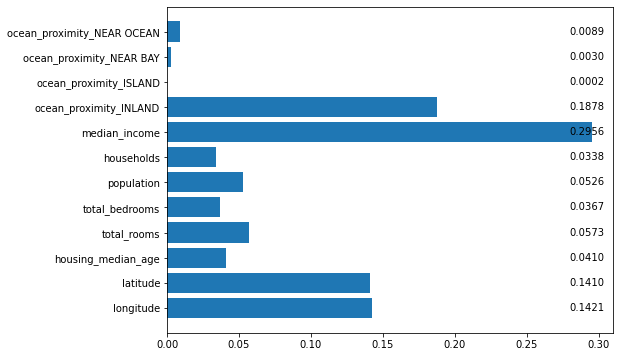

In [165]:
plt.figure(figsize = [8,6])
plt.barh(X_train.columns, GBR_final.feature_importances_)

for i in range(len(X_train.columns)):
    plt.annotate(str('{:,.4f}'.format(GBR_final.feature_importances_[i])),xy=(0.28,-0.1+i*1))

In [232]:
y_predict = GBR.predict(X_test_us)
y_predict_train = GBR.predict(X_train_us)

mae = mean_absolute_error(y_true = y_test_us, y_pred = y_predict)
mse = mean_squared_error(y_true = y_test_us, y_pred = y_predict)
rmse = mean_squared_error(y_true = y_test_us, y_pred = y_predict, squared=False)
r2_train = r2_score(y_true = y_train_us,y_pred =  y_predict_train)
r2_test = r2_score(y_true = y_test_us, y_pred = y_predict)

print("MSE:", mse)
print("MAE:",mae)
print("rmse", rmse)
print("R2 Train",r2_train)
print("R2 Test",r2_test)

MSE: 2058940716.7001913
MAE: 29797.048176086697
rmse 45375.55197130048
R2 Train 0.9997135203520741
R2 Test 0.794484248513834


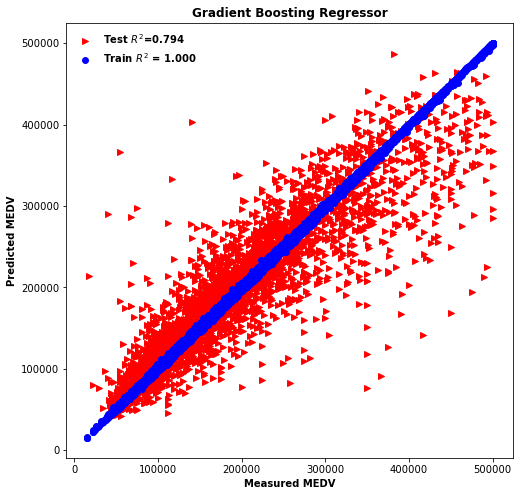

In [233]:
plt.figure(figsize = [8,8])

plt.scatter(y_test_us,GBR.predict(X_test_us),
            s = 35, 
            color = 'red', 
            marker = '>', 
            label = 'Test $R^{2}$=''%.3f'%r2_score(y_test_us,y_predict),
           alpha = 1)

plt.scatter(y_train_us, y_predict_train,
           s = 35,
           color = 'blue',
           marker = 'o',
           label = 'Train $R^{2}$ = ''%0.3f'%r2_score(y_train_us, y_predict_train),
           alpha = 1)

#plt.xlim(0,60)
#plt.ylim(0,60)
plt.legend(frameon=False,prop={'weight':'bold'})
plt.xlabel('Measured MEDV',fontweight='bold')
plt.ylabel('Predicted MEDV',fontweight='bold')
plt.title('Gradient Boosting Regressor',fontweight='bold')
#plt.axis('square')


plt.show()

In [234]:
consolidated_results

Model_Name     MAE            MSE    RMSE R2_Train R2_Test
0                      OLS  45,254  3,820,382,977  61,809   61.13%  61.87%
1                    RIDGE  45,255  3,820,267,465  61,808   61.13%  61.87%
2                    LASSO  45,254  3,820,382,590  61,809   61.13%  61.87%
3            KNN Regressor  38,524  3,147,722,040  56,105   75.13%  68.58%
4  Decision Tree Regressor  40,501  3,461,959,347  58,838   76.31%  65.44%
5  Random Forest Regressor  32,901  2,355,776,953  48,536   96.49%  76.49%

In [235]:
consolidated_results.loc[6] = ["Gradient Boosting Regressor",
                              '{:,.0f}'.format(mae),
                              '{:,.0f}'.format(mse),
                              '{:,.0f}'.format(rmse),
                              '{:,.2f}%'.format(r2_train*100),
                              '{:,.2f}%'.format(r2_test*100)]

In [236]:
consolidated_results

Model_Name     MAE            MSE    RMSE R2_Train R2_Test
0                          OLS  45,254  3,820,382,977  61,809   61.13%  61.87%
1                        RIDGE  45,255  3,820,267,465  61,808   61.13%  61.87%
2                        LASSO  45,254  3,820,382,590  61,809   61.13%  61.87%
3                KNN Regressor  38,524  3,147,722,040  56,105   75.13%  68.58%
4      Decision Tree Regressor  40,501  3,461,959,347  58,838   76.31%  65.44%
5      Random Forest Regressor  32,901  2,355,776,953  48,536   96.49%  76.49%
6  Gradient Boosting Regressor  29,797  2,058,940,717  45,376   99.97%  79.45%

-------------

### Support Vector Regression

In [179]:
from sklearn.svm import SVR
svr = SVR(kernel = 'rbf')
svr.fit(X_train, y_train.values.ravel())

SVR()

We need to scale the y variables as well for the Support Vector Machine. 

In [181]:
y_scaler = StandardScaler()
y_train_scaled = y_scaler.fit_transform(y_train)
y_test_scaled = y_scaler.fit_transform(y_test)

In [239]:
svr.fit(X_train,y_train_scaled.ravel())

SVR()

In [240]:
print(r2_score(y_train_scaled,svr.predict(X_train)))
print(r2_score(y_test_scaled,svr.predict(X_test)))

0.7382938603921764
0.728205429046479


In [241]:
y_predict = svr.predict(X_test)
y_predict_train = svr.predict(X_train)

mae = mean_absolute_error(y_true = y_test_scaled, y_pred = y_predict)
mse = mean_squared_error(y_true = y_test_scaled, y_pred = y_predict)
rmse = mean_squared_error(y_true = y_test_scaled, y_pred = y_predict, squared=False)
r2_train = r2_score(y_true = y_train_scaled, y_pred = y_predict_train)
r2_test = r2_score(y_true = y_test_scaled,y_pred= y_predict)

print("MSE:", mse)
print("MAE:",mae)
print("rmse", rmse)
print("R2 Train",r2_train)
print("R2 Test",r2_test)

MSE: 0.27179457095352094
MAE: 0.3522886992728093
rmse 0.5213392091081592
R2 Train 0.7382938603921764
R2 Test 0.728205429046479


##### Grid Search for Support Vector Regression
NOTE: SVR takes too much time therefore we will use the halving grid search instead of GridSearchCV.

In [242]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

In [243]:
parameter_list = {'C':[0.1,1,10,100],
                  'gamma':[1,0.1,0.01,0.001],
                  'kernel':['rbf','poly','sigmoid','linear'],
                 'verbose':[1]}

SVR_1 = HalvingGridSearchCV(SVR(),
                            parameter_list, 
                            cv = 5, 
                            scoring = 'r2',
                            n_jobs = -1, 
                            verbose = 5)
SVR_1.fit(X_train,y_train_scaled.ravel())

n_iterations: 4
n_required_iterations: 4
n_possible_iterations: 4
min_resources_: 524
max_resources_: 14157
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 64
n_resources: 524
Fitting 5 folds for each of 64 candidates, totalling 320 fits
*
optimization finished, #iter = 215
obj = -23.690512, rho = 0.140439
nSV = 360, nBSV = 325
.*
optimization finished, #iter = 217
obj = -24.614378, rho = 0.178655
nSV = 365, nBSV = 332
*
optimization finished, #iter = 231
obj = -22.229252, rho = 0.236664
nSV = 375, nBSV = 335
...*
optimization finished, #iter = 226
obj = -23.326054, rho = 0.161223
nSV = 371, nBSV = 325
*
optimization finished, #iter = 223
obj = -25.563239, rho = 0.255519
nSV = 379, nBSV = 344
....................................................................................*
optimization finished, #iter = 393
obj = -78.910557, rho = -0.012316
nSV = 418, nBSV = 418
................*
optimization finished, #iter = 393
obj = -74.035149, rho = -1.008054
nSV = 416

..........................*
optimization finished, #iter = 702
.obj = -123.589813, rho = -0.031821
nSV = 366, nBSV = 138
....................................*.........................*
optimization finished, #iter = 438
obj = -8049.880729, rho = 0.414974
nSV = 419, nBSV = 417
.......*
optimization finished, #iter = 457
obj = -7837.696908, rho = -9.396139
nSV = 419, nBSV = 416
...........................................................................*.............................................*.*
optimization finished, #iter = 33024
obj = -160.181796, rho = -0.073544
nSV = 350, nBSV = 337
...........*
optimization finished, #iter = 427
obj = -7387.882678, rho = 8.755006
nSV = 419, nBSV = 416
............................*
optimization finished, #iter = 403753
.obj = -11.011427, rho = -0.098435
nSV = 362, nBSV = 240
*
optimization finished, #iter = 364240
.obj = -12.550963, rho = -0.047909
nSV = 375, nBSV = 256
*
optimization finished, #iter = 541
obj = -125.444522, rho = -0.261140
nSV

..............................*....*
optimization finished, #iter = 2217
obj = -225.313360, rho = -0.119194
nSV = 364, nBSV = 6
..*.*.
optimization finished, #iter = 1815
.obj = -198.695762, rho = -0.250995
nSV = 371, nBSV = 9
..................................................*
optimization finished, #iter = 257
obj = -64584.515800, rho = -12.841498
nSV = 417, nBSV = 412
............*
optimization finished, #iter = 451
obj = -788752.951444, rho = 94.042739
nSV = 419, nBSV = 417
............................................................*.................*
optimization finished, #iter = 27451
obj = -1388.877177, rho = 0.038356
nSV = 358, nBSV = 272
.....................*....................................................................*
optimization finished, #iter = 320
.obj = -764019.060933, rho = -61.998681
nSV = 419, nBSV = 417
............*..................................................................................................................*.*
optimization finished, 

...............................................................*
optimization finished, #iter = 243
obj = -1758.185984, rho = 0.042763
nSV = 351, nBSV = 344
.............................................*.....................................*.............................................*...........*
optimization finished, #iter = 348
obj = -1945.628255, rho = -0.008182
nSV = 351, nBSV = 344
....................................*..........*...........................*................................................................................................*.......................................................................................................................................................*..........*.............*......................................*..............*
optimization finished, #iter = 126367
obj = -1559.622070, rho = -0.044856
nSV = 357, nBSV = 344
................................................................................................*.........

.....................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................*.....................................................................................................................................................*............*..............................................................*................................................................

...............................................................................................................................................................................*...................*....................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

................................................................................................................................................................................................................................................................................................................................*.......................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

...........................................................................................................................................................................................................................................................*............................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

..................................................................................................*.....................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

..................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................*.....................................................................................................................................................................................................................................................................................................................................................................................................................................

...........................................................................................[LibSVM][CV 1/5] END C=0.1, gamma=1, kernel=poly, verbose=1;, score=(train=0.805, test=-0.058) total time=   0.6s
[LibSVM][CV 3/5] END C=1, gamma=0.001, kernel=rbf, verbose=1;, score=(train=0.337, test=0.326) total time=   0.0s
[LibSVM][CV 4/5] END C=1, gamma=0.001, kernel=rbf, verbose=1;, score=(train=0.341, test=0.298) total time=   0.0s
[LibSVM][CV 5/5] END C=1, gamma=0.001, kernel=rbf, verbose=1;, score=(train=0.359, test=0.325) total time=   0.0s
[LibSVM][CV 1/5] END C=1, gamma=0.001, kernel=poly, verbose=1;, score=(train=-0.026, test=-0.039) total time=   0.0s
[LibSVM][CV 4/5] END C=10, gamma=1, kernel=linear, verbose=1;, score=(train=0.575, test=0.546) total time=   0.1s
[LibSVM][CV 5/5] END C=10, gamma=1, kernel=linear, verbose=1;, score=(train=0.628, test=0.645) total time=   0.1s
[LibSVM][CV 1/5] END C=10, gamma=0.1, kernel=rbf, verbose=1;, score=(train=0.828, test=0.626) total time=   

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

....................................................................................................................................................................................................................................................*...................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

.........................................................................................................................................................................*..............................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................*.......................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

..............................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................*.........................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

...........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................*............

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................*...............................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

...............................................................................................................*...................................................................................................................................................................................................................................................................................................................................*....................................*.........................................................................................................................................................*........................................................................................*...................................................................................................................*........................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

...............................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................*........................................................................

....................................................................................................................................................*...................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................*................*..............................................................................................................................................................................................................................................................................................................................................

.obj = -44587.097640, rho = -0.068396
nSV = 1063, nBSV = 1049
...............................................................................................................................................................
*....
.*
optimization finished, #iter = 3473
obj = -46.715927, rho = -0.049758
nSV = 1049, nBSV = 1036
.........................................................
*.......
*
optimization finished, #iter = 3690
.obj = -44.922379, rho = -0.051382
nSV = 1043, nBSV = 1031
............................................................................................
.*.....*..*
optimization finished, #iter = 3759
.obj = -45.114682, rho = 0.014860
nSV = 1049, nBSV = 1033
..........................................................
*..*.
*
optimization finished, #iter = 4353
obj = -45.235558, rho = -0.065524
nSV = 1060, nBSV = 1048
.
*..
*
optimization finished, #iter = 3473
obj = -46.715927, rho = -0.049758
nSV = 1049, nBSV = 1036
.................
*...*....*
optimization finishe

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

..............................................................................................................................................................................................................................................................*.........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

.......................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................*................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................*...............................................................................................................................................................................................................................................................................................................................................................................................................................................................................

....................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................*...................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

..............................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................*.................................................................................................*.......................................................................................................................................................................................................................................................................................

.....................................................................................................................................................................................................................................................*..................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

.............................................................................................................................................................................................................*..........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

...............................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................*...................................................................................................*....................................................................................................

.............................................................................................................................................................................................................................................................................................................................................................*..........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

.....................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................*..................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................*...............................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

...................................................................................................................................................................*....................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

HalvingGridSearchCV(estimator=SVR(), n_jobs=-1,
                    param_grid={'C': [0.1, 1, 10, 100],
                                'gamma': [1, 0.1, 0.01, 0.001],
                                'kernel': ['rbf', 'poly', 'sigmoid', 'linear'],
                                'verbose': [1]},
                    scoring='r2', verbose=5)

In [244]:
SVR_1.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf', 'verbose': 1}

In [182]:
SVR_final = SVR(C=100,gamma = 0.1, kernel = 'rbf', verbose = 1)
SVR_final.fit(X_train,y_train_scaled.ravel())

[LibSVM].........................................................................................................................................................................................................................................................................................................................................................................................................................................................*................................................................................................................................................................................................................................................................................................................................................................................................................*.............................................................*
optimization finished, #iter = 902270
obj = -306158.367808, rho = -0.825783
nSV = 1039

SVR(C=100, gamma=0.1, verbose=1)

In [195]:
SVR_final.kernel

'rbf'

In [246]:
y_predict  = SVR_final.predict(X_test)*np.std(y_test)[0] + np.mean(y_test,axis=0)[0]
y_predict_train = SVR_final.predict(X_train)*np.std(y_train)[0] + np.mean(y_train,axis=0)[0]

mae = mean_absolute_error(y_true = y_test, y_pred = y_predict)
mse = mean_squared_error(y_true = y_test, y_pred = y_predict)
rmse = mean_squared_error(y_true = y_test, y_pred = y_predict, squared=False)
r2_train = r2_score(y_true = y_train, y_pred = y_predict_train)
r2_test = r2_score(y_true = y_test,y_pred= y_predict)

print("MSE:", mse)
print("MAE:",mae)
print("rmse", rmse)
print("R2 Train",r2_train)
print("R2 Test",r2_test)

MSE: 2525698494.5105524
MAE: 33605.68388856003
rmse 50256.32790515591
R2 Train 0.7981166448142248
R2 Test 0.7478942351683078


In [247]:
consolidated_results

Model_Name     MAE            MSE    RMSE R2_Train R2_Test
0                          OLS  45,254  3,820,382,977  61,809   61.13%  61.87%
1                        RIDGE  45,255  3,820,267,465  61,808   61.13%  61.87%
2                        LASSO  45,254  3,820,382,590  61,809   61.13%  61.87%
3                KNN Regressor  38,524  3,147,722,040  56,105   75.13%  68.58%
4      Decision Tree Regressor  40,501  3,461,959,347  58,838   76.31%  65.44%
5      Random Forest Regressor  32,901  2,355,776,953  48,536   96.49%  76.49%
6  Gradient Boosting Regressor  29,797  2,058,940,717  45,376   99.97%  79.45%

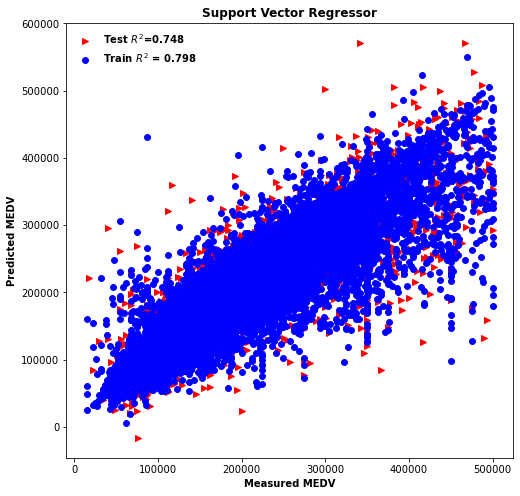

In [248]:
plt.figure(figsize = [8,8])

plt.scatter(y_test_us,y_predict,
            s = 35, 
            color = 'red', 
            marker = '>', 
            label = 'Test $R^{2}$=''%.3f'%r2_score(y_test_us,y_predict),
           alpha = 1)

plt.scatter(y_train_us, y_predict_train,
           s = 35,
           color = 'blue',
           marker = 'o',
           label = 'Train $R^{2}$ = ''%0.3f'%r2_score(y_train_us, y_predict_train),
           alpha = 1)

#plt.xlim(0,60)
#plt.ylim(0,60)
plt.legend(frameon=False,prop={'weight':'bold'})
plt.xlabel('Measured MEDV',fontweight='bold')
plt.ylabel('Predicted MEDV',fontweight='bold')
plt.title('Support Vector Regressor',fontweight='bold')
#plt.axis('square')


plt.show()

In [249]:
consolidated_results.loc[7] = ["Support Vector Regressor",
                              '{:,.0f}'.format(mae),
                              '{:,.0f}'.format(mse),
                              '{:,.0f}'.format(rmse),
                              '{:,.2f}%'.format(r2_train*100),
                              '{:,.2f}%'.format(r2_test*100)]

In [250]:
consolidated_results

Model_Name     MAE            MSE    RMSE R2_Train R2_Test
0                          OLS  45,254  3,820,382,977  61,809   61.13%  61.87%
1                        RIDGE  45,255  3,820,267,465  61,808   61.13%  61.87%
2                        LASSO  45,254  3,820,382,590  61,809   61.13%  61.87%
3                KNN Regressor  38,524  3,147,722,040  56,105   75.13%  68.58%
4      Decision Tree Regressor  40,501  3,461,959,347  58,838   76.31%  65.44%
5      Random Forest Regressor  32,901  2,355,776,953  48,536   96.49%  76.49%
6  Gradient Boosting Regressor  29,797  2,058,940,717  45,376   99.97%  79.45%
7     Support Vector Regressor  33,606  2,525,698,495  50,256   79.81%  74.79%

### Artificial Neural Network 

In [251]:
import math
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam,RMSprop
from tensorflow.keras.layers import Dense, Dropout, InputLayer
from tensorflow.keras.losses import MeanSquaredLogarithmicError, MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError,mean_absolute_error
from tensorflow.keras.optimizers import SGD

In [266]:
def r_square(y_test, y_predtest):
    from keras import backend as K
    SS_res =  K.sum(K.square(y_test - y_predtest)) 
    SS_tot = K.sum(K.square(y_test - K.mean(y_test))) 
    return (1 - (SS_res)/(SS_tot))

In [267]:
from math import sqrt
#Architcture of NN with dropout layer
def create_model():
    model = Sequential()
    model.add(Dense(400, input_dim=12, activation='tanh'))
    model.add(Dropout(0.20))
    model.add(Dense(400, activation='relu'))
    model.add(Dropout(0.20))
    model.add(Dense(400, activation='relu'))
    #model.add(Dropout(0.20))
    model.add(Dense(300, activation='relu'))
    #model.add(Dropout(0.20))
    model.add(Dense(1))
    # Compile model
    sgd = keras.optimizers.Adam(learning_rate=0.01)
    model.compile(loss = tf.keras.losses.MeanSquaredError(), optimizer=sgd, metrics = [r_square])
    return model
#Model is called here
model=create_model()

In [268]:
model_1 = model.fit(X_train.values, # Features
                      y_train.values, # Target vector
                      epochs = 100,
                      verbose = 1,
                      validation_data = (X_test.values,y_test.values)) # Data for evaluation

Epoch 1/100
  8/443 [..............................] - ETA: 3s - loss: 39647264768.0000 - r_square: -3.8182  

2022-08-13 10:38:06.548465: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


443/443 [==============================] - ETA: 0s - loss: 5306999296.0000 - r_square: 0.4052

2022-08-13 10:38:09.915202: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


443/443 [==============================] - 4s 8ms/step - loss: 5306999296.0000 - r_square: 0.4052 - val_loss: 3612019712.0000 - val_r_square: 0.6107
Epoch 2/100
443/443 [==============================] - 3s 8ms/step - loss: 3632973824.0000 - r_square: 0.5891 - val_loss: 3228479488.0000 - val_r_square: 0.6554
Epoch 3/100
443/443 [==============================] - 4s 8ms/step - loss: 3223846912.0000 - r_square: 0.6395 - val_loss: 3227134976.0000 - val_r_square: 0.6479
Epoch 4/100
443/443 [==============================] - 4s 8ms/step - loss: 3096876288.0000 - r_square: 0.6508 - val_loss: 2990811904.0000 - val_r_square: 0.6850
Epoch 5/100
443/443 [==============================] - 4s 8ms/step - loss: 3023905280.0000 - r_square: 0.6598 - val_loss: 3002695424.0000 - val_r_square: 0.6818
Epoch 6/100
443/443 [==============================] - 4s 8ms/step - loss: 2947808256.0000 - r_square: 0.6650 - val_loss: 3070141184.0000 - val_r_square: 0.6806
Epoch 7/100
443/443 [=========================

Epoch 52/100
443/443 [==============================] - 3s 7ms/step - loss: 1990691072.0000 - r_square: 0.7777 - val_loss: 2456782848.0000 - val_r_square: 0.7457
Epoch 53/100
443/443 [==============================] - 3s 8ms/step - loss: 2007504000.0000 - r_square: 0.7751 - val_loss: 2599603200.0000 - val_r_square: 0.7311
Epoch 54/100
443/443 [==============================] - 3s 8ms/step - loss: 1964343168.0000 - r_square: 0.7785 - val_loss: 2623803904.0000 - val_r_square: 0.7277
Epoch 55/100
443/443 [==============================] - 3s 8ms/step - loss: 1968720512.0000 - r_square: 0.7797 - val_loss: 2395451392.0000 - val_r_square: 0.7485
Epoch 56/100
443/443 [==============================] - 3s 8ms/step - loss: 1968003072.0000 - r_square: 0.7763 - val_loss: 2593603584.0000 - val_r_square: 0.7307
Epoch 57/100
443/443 [==============================] - 3s 8ms/step - loss: 1944321152.0000 - r_square: 0.7799 - val_loss: 2475203584.0000 - val_r_square: 0.7383
Epoch 58/100
443/443 [======

In [269]:
y_pred = model.predict(X_test)

2022-08-13 10:44:08.846585: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [265]:
print("Test Score:",r2_score(y_true = y_test,y_pred = y_pred))
print("Train Score:", r2_score(y_true= y_train, y_pred= model.predict(X_train)))

Test Score: 0.7531891621727242
Train Score: 0.8311358107973864


In [270]:
print("Test Score:",r2_score(y_true = y_test,y_pred = y_pred))
print("Train Score:", r2_score(y_true= y_train, y_pred= model.predict(X_train)))

Test Score: 0.7196901704835378
Train Score: 0.8054957559941833


In [263]:
consolidated_results

Model_Name     MAE            MSE    RMSE R2_Train R2_Test
0                          OLS  45,254  3,820,382,977  61,809   61.13%  61.87%
1                        RIDGE  45,255  3,820,267,465  61,808   61.13%  61.87%
2                        LASSO  45,254  3,820,382,590  61,809   61.13%  61.87%
3                KNN Regressor  38,524  3,147,722,040  56,105   75.13%  68.58%
4      Decision Tree Regressor  40,501  3,461,959,347  58,838   76.31%  65.44%
5      Random Forest Regressor  32,901  2,355,776,953  48,536   96.49%  76.49%
6  Gradient Boosting Regressor  29,797  2,058,940,717  45,376   99.97%  79.45%
7     Support Vector Regressor  33,606  2,525,698,495  50,256   79.81%  74.79%

##### Grid Search on the ANN

In [271]:
def create_model(Optimizer_test):
    model = Sequential()
    model.add(Dense(400, input_dim=12, activation='tanh'))
    model.add(Dropout(0.20))
    model.add(Dense(400, activation='relu'))
    model.add(Dropout(0.20))
    model.add(Dense(400, activation='relu'))
    #model.add(Dropout(0.20))
    model.add(Dense(300, activation='relu'))
    #model.add(Dropout(0.20))
    model.add(Dense(1))
    # Compile model
    sgd = keras.optimizers.Adam(learning_rate=0.01)
    model.compile(loss = tf.keras.losses.MeanSquaredError(), optimizer=Optimizer_test, metrics = [r_square])
    return model

In [282]:
tuned_parameters = {'batch_size':[10,20,100,200,400,1000],
                   'epochs':[20,50,100,200,500],
                   'Optimizer_test':['adam','rmsprop','sgd']}
tune_parameters_1 = {'batch_size':[100],
                    'epochs':[20],
                    'Optimizer_test':['adam']}

In [283]:
from sklearn.metrics import make_scorer

In [284]:
my_scoring = make_scorer(r_square,greater_is_better=True)

In [285]:
from keras.wrappers.scikit_learn import KerasRegressor

In [286]:
RegModelANN = KerasRegressor(create_model, verbose = 0)

/var/folders/_2/wkdg5x312kv10z8lrkqv6s980000gn/T/ipykernel_4671/535905774.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  RegModelANN = KerasRegressor(create_model, verbose = 0)


In [290]:
gridsearchANN = GridSearchCV(estimator = RegModelANN,
                            param_grid = tuned_parameters,
                            scoring = my_scoring,
                            cv = 10)

In [ ]:
import time
StartTime = time.time()
gridsearchANN.fit(X_train.values, y_train.values,verbose = 1)
EndTime = time.time()

Epoch 1/20
   8/1275 [..............................] - ETA: 9s - loss: 35708063744.0000 - r_square: -5.6627  

2022-08-13 11:31:47.794065: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1275/1275 [==============================] - 9s 7ms/step - loss: 6559270912.0000 - r_square: -inf
Epoch 2/20
1275/1275 [==============================] - 9s 7ms/step - loss: 3450525952.0000 - r_square: -inf
Epoch 3/20
1275/1275 [==============================] - 9s 7ms/step - loss: 3292547328.0000 - r_square: -inf
Epoch 4/20
1275/1275 [==============================] - 9s 7ms/step - loss: 3140446208.0000 - r_square: -inf
Epoch 5/20
1275/1275 [==============================] - 9s 7ms/step - loss: 3073843712.0000 - r_square: -inf
Epoch 6/20
1275/1275 [==============================] - 9s 7ms/step - loss: 3021490432.0000 - r_square: -inf
Epoch 7/20
1275/1275 [==============================] - 9s 7ms/step - loss: 3000273920.0000 - r_square: -inf
Epoch 8/20
1275/1275 [==============================] - 9s 7ms/step - loss: 2973070848.0000 - r_square: -inf
Epoch 9/20
1275/1275 [==============================] - 9s 7ms/step - loss: 2929216768.0000 - r_square: -inf
Epoch 10/20
1275/1275 [=======

2022-08-13 11:34:49.732036: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/20
   7/1275 [..............................] - ETA: 10s - loss: 54177243136.0000 - r_square: -4.7623 

2022-08-13 11:34:50.380167: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1275/1275 [==============================] - 9s 7ms/step - loss: 6466183168.0000 - r_square: -inf
Epoch 2/20
1275/1275 [==============================] - 9s 7ms/step - loss: 3426154752.0000 - r_square: -inf
Epoch 3/20
1275/1275 [==============================] - 9s 7ms/step - loss: 3232437504.0000 - r_square: -inf
Epoch 4/20
1275/1275 [==============================] - 9s 7ms/step - loss: 3130712320.0000 - r_square: -inf
Epoch 5/20
1275/1275 [==============================] - 9s 7ms/step - loss: 3065762304.0000 - r_square: -inf
Epoch 6/20
1275/1275 [==============================] - 9s 7ms/step - loss: 2992887296.0000 - r_square: -inf
Epoch 7/20
1275/1275 [==============================] - 9s 7ms/step - loss: 2980285440.0000 - r_square: -inf
Epoch 8/20
1275/1275 [==============================] - 9s 7ms/step - loss: 2953355776.0000 - r_square: -inf
Epoch 9/20
1275/1275 [==============================] - 9s 7ms/step - loss: 2938743552.0000 - r_square: -inf
Epoch 10/20
1275/1275 [=======

2022-08-13 11:37:47.287970: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/20
   7/1275 [..............................] - ETA: 10s - loss: 51278266368.0000 - r_square: -4.4570 

2022-08-13 11:37:47.842464: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1275/1275 [==============================] - 9s 7ms/step - loss: 6479316992.0000 - r_square: -inf
Epoch 2/20
1275/1275 [==============================] - 9s 7ms/step - loss: 3469711104.0000 - r_square: -inf
Epoch 3/20
1275/1275 [==============================] - 9s 7ms/step - loss: 3265412864.0000 - r_square: -inf
Epoch 4/20
1275/1275 [==============================] - 9s 7ms/step - loss: 3148730112.0000 - r_square: -inf
Epoch 5/20
1275/1275 [==============================] - 9s 7ms/step - loss: 3097068288.0000 - r_square: -inf
Epoch 6/20
1275/1275 [==============================] - 9s 7ms/step - loss: 3063538432.0000 - r_square: -inf
Epoch 7/20
1275/1275 [==============================] - 9s 7ms/step - loss: 3019961600.0000 - r_square: -inf
Epoch 8/20
1275/1275 [==============================] - 9s 7ms/step - loss: 2989353984.0000 - r_square: -inf
Epoch 9/20
1275/1275 [==============================] - 9s 7ms/step - loss: 2962183680.0000 - r_square: -inf
Epoch 10/20
1275/1275 [=======

2022-08-13 11:40:43.840927: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/20
   8/1275 [..............................] - ETA: 9s - loss: 37179576320.0000 - r_square: -3.8867   

2022-08-13 11:40:44.673515: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1275/1275 [==============================] - 9s 7ms/step - loss: 6430220288.0000 - r_square: -inf
Epoch 2/20
1275/1275 [==============================] - 9s 7ms/step - loss: 3434238208.0000 - r_square: -inf
Epoch 3/20
1275/1275 [==============================] - 9s 7ms/step - loss: 3258934528.0000 - r_square: -inf
Epoch 4/20
1275/1275 [==============================] - 9s 7ms/step - loss: 3142397440.0000 - r_square: -inf
Epoch 5/20
1275/1275 [==============================] - 9s 7ms/step - loss: 3091213568.0000 - r_square: -inf
Epoch 6/20
1275/1275 [==============================] - 9s 7ms/step - loss: 3043665920.0000 - r_square: -inf
Epoch 7/20
1275/1275 [==============================] - 9s 7ms/step - loss: 2989500416.0000 - r_square: -inf
Epoch 8/20
1275/1275 [==============================] - 9s 7ms/step - loss: 2952427520.0000 - r_square: -inf
Epoch 9/20
1275/1275 [==============================] - 9s 7ms/step - loss: 2950256896.0000 - r_square: -inf
Epoch 10/20
1275/1275 [=======

2022-08-13 11:43:43.005157: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/20
   8/1275 [..............................] - ETA: 9s - loss: 47803396096.0000 - r_square: -4.8498  

2022-08-13 11:43:43.549726: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1275/1275 [==============================] - 9s 7ms/step - loss: 6627428864.0000 - r_square: -inf
Epoch 2/20
1275/1275 [==============================] - 9s 7ms/step - loss: 3479308032.0000 - r_square: -inf
Epoch 3/20
1275/1275 [==============================] - 9s 7ms/step - loss: 3347285504.0000 - r_square: -inf
Epoch 4/20
1275/1275 [==============================] - 9s 7ms/step - loss: 3229190400.0000 - r_square: -inf
Epoch 5/20
1275/1275 [==============================] - 9s 7ms/step - loss: 3145517568.0000 - r_square: -inf
Epoch 6/20
1275/1275 [==============================] - 9s 7ms/step - loss: 3081772544.0000 - r_square: -inf
Epoch 7/20
1275/1275 [==============================] - 9s 7ms/step - loss: 3045943808.0000 - r_square: -inf
Epoch 8/20
1275/1275 [==============================] - 9s 7ms/step - loss: 2989857280.0000 - r_square: -inf
Epoch 9/20
1275/1275 [==============================] - 9s 7ms/step - loss: 2959561216.0000 - r_square: -inf
Epoch 10/20
1275/1275 [=======

2022-08-13 11:46:41.332946: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/20
   8/1275 [..............................] - ETA: 9s - loss: 41708392448.0000 - r_square: -5.8467  

2022-08-13 11:46:41.873319: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1275/1275 [==============================] - 9s 7ms/step - loss: 6524364288.0000 - r_square: -inf
Epoch 2/20
1275/1275 [==============================] - 9s 7ms/step - loss: 3421613056.0000 - r_square: -inf
Epoch 3/20
1275/1275 [==============================] - 9s 7ms/step - loss: 3274414080.0000 - r_square: -inf
Epoch 4/20
1275/1275 [==============================] - 9s 7ms/step - loss: 3198438400.0000 - r_square: -inf
Epoch 5/20
1275/1275 [==============================] - 9s 7ms/step - loss: 3105550592.0000 - r_square: -inf
Epoch 6/20
1275/1275 [==============================] - 9s 7ms/step - loss: 3030747392.0000 - r_square: -inf
Epoch 7/20
1275/1275 [==============================] - 9s 7ms/step - loss: 2998625792.0000 - r_square: -inf
Epoch 8/20
1275/1275 [==============================] - 9s 7ms/step - loss: 2976628224.0000 - r_square: -inf
Epoch 9/20
1275/1275 [==============================] - 9s 7ms/step - loss: 2952308224.0000 - r_square: -inf
Epoch 10/20
1275/1275 [=======

2022-08-13 11:49:38.631397: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/20
   7/1275 [..............................] - ETA: 11s - loss: 42019004416.0000 - r_square: -5.4750 

2022-08-13 11:49:39.179959: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1275/1275 [==============================] - 9s 7ms/step - loss: 6511607808.0000 - r_square: -inf
Epoch 2/20
1275/1275 [==============================] - 9s 7ms/step - loss: 3450473984.0000 - r_square: -inf
Epoch 3/20
1275/1275 [==============================] - 9s 7ms/step - loss: 3252716800.0000 - r_square: -inf
Epoch 4/20
1275/1275 [==============================] - 9s 7ms/step - loss: 3146078976.0000 - r_square: -inf
Epoch 5/20
1275/1275 [==============================] - 9s 7ms/step - loss: 3099019776.0000 - r_square: -inf
Epoch 6/20
1275/1275 [==============================] - 9s 7ms/step - loss: 3043631872.0000 - r_square: -inf
Epoch 7/20
1275/1275 [==============================] - 9s 7ms/step - loss: 3009862912.0000 - r_square: -inf
Epoch 8/20
1275/1275 [==============================] - 9s 7ms/step - loss: 2984184320.0000 - r_square: -inf
Epoch 9/20
1275/1275 [==============================] - 9s 7ms/step - loss: 2943871744.0000 - r_square: -inf
Epoch 10/20
1275/1275 [=======

2022-08-13 11:52:39.235321: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/20
   1/1275 [..............................] - ETA: 7:29 - loss: 71304429568.0000 - r_square: -5.2943

2022-08-13 11:52:39.774006: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1275/1275 [==============================] - 9s 7ms/step - loss: 6499267584.0000 - r_square: 0.1302
Epoch 2/20
1275/1275 [==============================] - 9s 7ms/step - loss: 3441398016.0000 - r_square: 0.5372
Epoch 3/20
1275/1275 [==============================] - 9s 7ms/step - loss: 3275251200.0000 - r_square: 0.5597
Epoch 4/20
1275/1275 [==============================] - 9s 7ms/step - loss: 3162225920.0000 - r_square: 0.5611
Epoch 5/20
1275/1275 [==============================] - 9s 7ms/step - loss: 3094839552.0000 - r_square: 0.5874
Epoch 6/20
1275/1275 [==============================] - 9s 7ms/step - loss: 3066663424.0000 - r_square: 0.5876
Epoch 7/20
1275/1275 [==============================] - 9s 7ms/step - loss: 3029234176.0000 - r_square: 0.5835
Epoch 8/20
1275/1275 [==============================] - 9s 7ms/step - loss: 2979964672.0000 - r_square: 0.5894
Epoch 9/20
1275/1275 [==============================] - 9s 7ms/step - loss: 2937342720.0000 - r_square: 0.6010
Epoch 10/20


2022-08-13 11:55:35.286184: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/20
   1/1275 [..............................] - ETA: 7:59 - loss: 37861335040.0000 - r_square: -3.8066

2022-08-13 11:55:35.944109: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1275/1275 [==============================] - 9s 7ms/step - loss: 6511341568.0000 - r_square: 0.1160
Epoch 2/20
1275/1275 [==============================] - 9s 7ms/step - loss: 3411882496.0000 - r_square: 0.5442
Epoch 3/20
1275/1275 [==============================] - 9s 7ms/step - loss: 3215102720.0000 - r_square: 0.5585
Epoch 4/20
1275/1275 [==============================] - 9s 7ms/step - loss: 3132927232.0000 - r_square: 0.5747
Epoch 5/20
1275/1275 [==============================] - 9s 7ms/step - loss: 3078123264.0000 - r_square: 0.5769
Epoch 6/20
1275/1275 [==============================] - 9s 7ms/step - loss: 3029167872.0000 - r_square: 0.5866
Epoch 7/20
1275/1275 [==============================] - 9s 7ms/step - loss: 3010388224.0000 - r_square: 0.5885
Epoch 8/20
1275/1275 [==============================] - 9s 7ms/step - loss: 2974305024.0000 - r_square: 0.6011
Epoch 9/20
1275/1275 [==============================] - 9s 7ms/step - loss: 2937542656.0000 - r_square: 0.5907
Epoch 10/20


2022-08-13 11:58:30.268992: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/20
   1/1275 [..............................] - ETA: 8:04 - loss: 40437477376.0000 - r_square: -6.2607

2022-08-13 11:58:30.803150: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1275/1275 [==============================] - 9s 7ms/step - loss: 6465403392.0000 - r_square: 0.1264
Epoch 2/20
1275/1275 [==============================] - 9s 7ms/step - loss: 3411086080.0000 - r_square: 0.5382
Epoch 3/20
1275/1275 [==============================] - 9s 7ms/step - loss: 3227915776.0000 - r_square: 0.5670
Epoch 4/20
1275/1275 [==============================] - 9s 7ms/step - loss: 3134449408.0000 - r_square: 0.5601
Epoch 5/20
1275/1275 [==============================] - 9s 7ms/step - loss: 3072681728.0000 - r_square: 0.5811
Epoch 6/20
1275/1275 [==============================] - 9s 7ms/step - loss: 3022133504.0000 - r_square: 0.5928
Epoch 7/20
1275/1275 [==============================] - 9s 7ms/step - loss: 2966580224.0000 - r_square: 0.5839
Epoch 8/20
1275/1275 [==============================] - 9s 7ms/step - loss: 2959554560.0000 - r_square: -1.8025
Epoch 9/20
1275/1275 [==============================] - 9s 7ms/step - loss: 2920109568.0000 - r_square: 0.6061
Epoch 10/20

2022-08-13 12:01:24.880581: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/50
   1/1275 [..............................] - ETA: 7:54 - loss: 76730933248.0000 - r_square: -4.7967

2022-08-13 12:01:25.426371: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1275/1275 [==============================] - 9s 7ms/step - loss: 6490648064.0000 - r_square: -inf
Epoch 2/50
1275/1275 [==============================] - 9s 7ms/step - loss: 3422216448.0000 - r_square: -inf
Epoch 3/50
1275/1275 [==============================] - 9s 7ms/step - loss: 3250671104.0000 - r_square: -inf
Epoch 4/50
1275/1275 [==============================] - 9s 7ms/step - loss: 3139035648.0000 - r_square: -inf
Epoch 5/50
1275/1275 [==============================] - 9s 7ms/step - loss: 3084250880.0000 - r_square: -inf
Epoch 6/50
1275/1275 [==============================] - 9s 7ms/step - loss: 3049351424.0000 - r_square: -inf
Epoch 7/50
1275/1275 [==============================] - 9s 7ms/step - loss: 2991191040.0000 - r_square: -inf
Epoch 8/50
1275/1275 [==============================] - 9s 7ms/step - loss: 2959516160.0000 - r_square: -inf
Epoch 9/50
1275/1275 [==============================] - 9s 7ms/step - loss: 2930005248.0000 - r_square: -inf
Epoch 10/50
1275/1275 [=======

2022-08-13 12:08:51.776958: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/50
   1/1275 [..............................] - ETA: 8:08 - loss: 50323107840.0000 - r_square: -4.0130

2022-08-13 12:08:52.326369: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1275/1275 [==============================] - 9s 7ms/step - loss: 6539736064.0000 - r_square: -inf
Epoch 2/50
1275/1275 [==============================] - 9s 7ms/step - loss: 3455813120.0000 - r_square: -inf
Epoch 3/50
1275/1275 [==============================] - 9s 7ms/step - loss: 3315795712.0000 - r_square: -inf
Epoch 4/50
1275/1275 [==============================] - 9s 7ms/step - loss: 3206223872.0000 - r_square: -inf
Epoch 5/50
1275/1275 [==============================] - 9s 7ms/step - loss: 3139752960.0000 - r_square: -inf
Epoch 6/50
1275/1275 [==============================] - 9s 7ms/step - loss: 3067105792.0000 - r_square: -inf
Epoch 7/50
1275/1275 [==============================] - 9s 7ms/step - loss: 3024164352.0000 - r_square: -inf
Epoch 8/50
1275/1275 [==============================] - 9s 7ms/step - loss: 2999691008.0000 - r_square: -inf
Epoch 9/50
1275/1275 [==============================] - 9s 7ms/step - loss: 2946984960.0000 - r_square: -inf
Epoch 10/50
1275/1275 [=======

2022-08-13 12:16:13.194710: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/50
   1/1275 [..............................] - ETA: 8:02 - loss: 75865473024.0000 - r_square: -3.8908

2022-08-13 12:16:13.749165: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1275/1275 [==============================] - 9s 7ms/step - loss: 6538996736.0000 - r_square: -inf
Epoch 2/50
1275/1275 [==============================] - 9s 7ms/step - loss: 3440050688.0000 - r_square: -inf
Epoch 3/50
1275/1275 [==============================] - 9s 7ms/step - loss: 3266920192.0000 - r_square: -inf
Epoch 4/50
1275/1275 [==============================] - 9s 7ms/step - loss: 3156254720.0000 - r_square: -inf
Epoch 5/50
1275/1275 [==============================] - 9s 7ms/step - loss: 3089541888.0000 - r_square: -inf
Epoch 6/50
1275/1275 [==============================] - 9s 7ms/step - loss: 3042920960.0000 - r_square: -inf
Epoch 7/50
1275/1275 [==============================] - 9s 7ms/step - loss: 3017633280.0000 - r_square: -inf
Epoch 8/50
1275/1275 [==============================] - 9s 7ms/step - loss: 2961606400.0000 - r_square: -inf
Epoch 9/50
1275/1275 [==============================] - 9s 7ms/step - loss: 2956026880.0000 - r_square: -inf
Epoch 10/50
1275/1275 [=======

2022-08-13 12:23:31.417338: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/50
   1/1275 [..............................] - ETA: 20:00 - loss: 44766687232.0000 - r_square: -3.4080

2022-08-13 12:23:32.557477: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1275/1275 [==============================] - 10s 7ms/step - loss: 6443466752.0000 - r_square: -inf
Epoch 2/50
1275/1275 [==============================] - 9s 7ms/step - loss: 3377769728.0000 - r_square: -inf
Epoch 3/50
1275/1275 [==============================] - 9s 7ms/step - loss: 3229412096.0000 - r_square: -inf
Epoch 4/50
1275/1275 [==============================] - 9s 7ms/step - loss: 3134290688.0000 - r_square: -inf
Epoch 5/50
1275/1275 [==============================] - 9s 7ms/step - loss: 3051974400.0000 - r_square: -inf
Epoch 6/50
1275/1275 [==============================] - 9s 7ms/step - loss: 3022735872.0000 - r_square: -inf
Epoch 7/50
1275/1275 [==============================] - 9s 7ms/step - loss: 2972225792.0000 - r_square: -inf
Epoch 8/50
1275/1275 [==============================] - 9s 7ms/step - loss: 2948603904.0000 - r_square: -inf
Epoch 9/50
1275/1275 [==============================] - 9s 7ms/step - loss: 2918789888.0000 - r_square: -inf
Epoch 10/50
1275/1275 [======

2022-08-13 12:30:50.921666: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/50
   1/1275 [..............................] - ETA: 7:34 - loss: 43385364480.0000 - r_square: -8.5794

2022-08-13 12:30:51.473048: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1275/1275 [==============================] - 9s 7ms/step - loss: 6456359936.0000 - r_square: -inf
Epoch 2/50
1275/1275 [==============================] - 9s 7ms/step - loss: 3478482944.0000 - r_square: -inf
Epoch 3/50
1275/1275 [==============================] - 9s 7ms/step - loss: 3280971520.0000 - r_square: -inf
Epoch 4/50
1275/1275 [==============================] - 9s 7ms/step - loss: 3195253504.0000 - r_square: -inf
Epoch 5/50
1275/1275 [==============================] - 9s 7ms/step - loss: 3120469504.0000 - r_square: -inf
Epoch 6/50
1275/1275 [==============================] - 9s 7ms/step - loss: 3051853312.0000 - r_square: -inf
Epoch 7/50
1275/1275 [==============================] - 9s 7ms/step - loss: 3012846848.0000 - r_square: -inf
Epoch 8/50
1275/1275 [==============================] - 9s 7ms/step - loss: 2970335232.0000 - r_square: -inf
Epoch 9/50
1275/1275 [==============================] - 9s 7ms/step - loss: 2929054208.0000 - r_square: -inf
Epoch 10/50
1275/1275 [=======

2022-08-13 12:38:24.911129: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/50
   1/1275 [..............................] - ETA: 7:40 - loss: 22265337856.0000 - r_square: -5.6831

2022-08-13 12:38:25.452054: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1275/1275 [==============================] - 10s 7ms/step - loss: 6600003584.0000 - r_square: -inf
Epoch 2/50
1275/1275 [==============================] - 9s 7ms/step - loss: 3473435136.0000 - r_square: -inf
Epoch 3/50
1275/1275 [==============================] - 9s 7ms/step - loss: 3273996032.0000 - r_square: -inf
Epoch 4/50
1275/1275 [==============================] - 9s 7ms/step - loss: 3186168576.0000 - r_square: -inf
Epoch 5/50
1275/1275 [==============================] - 9s 7ms/step - loss: 3109779968.0000 - r_square: -inf
Epoch 6/50
1275/1275 [==============================] - 9s 7ms/step - loss: 3060781568.0000 - r_square: -inf
Epoch 7/50
1275/1275 [==============================] - 9s 7ms/step - loss: 3029005312.0000 - r_square: -inf
Epoch 8/50
1275/1275 [==============================] - 9s 7ms/step - loss: 2974647296.0000 - r_square: -inf
Epoch 9/50
1275/1275 [==============================] - 9s 7ms/step - loss: 2969726720.0000 - r_square: -inf
Epoch 10/50
1275/1275 [======

2022-08-13 12:46:08.066427: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/50
   1/1275 [..............................] - ETA: 7:54 - loss: 49046089728.0000 - r_square: -5.9774

2022-08-13 12:46:08.617647: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1275/1275 [==============================] - 9s 7ms/step - loss: 6535315968.0000 - r_square: -inf
Epoch 2/50
1275/1275 [==============================] - 9s 7ms/step - loss: 3454524672.0000 - r_square: -inf
Epoch 3/50
1275/1275 [==============================] - 9s 7ms/step - loss: 3302103296.0000 - r_square: -inf
Epoch 4/50
1275/1275 [==============================] - 9s 7ms/step - loss: 3192196096.0000 - r_square: -inf
Epoch 5/50
1275/1275 [==============================] - 9s 7ms/step - loss: 3132523520.0000 - r_square: -inf
Epoch 6/50
1275/1275 [==============================] - 9s 7ms/step - loss: 3060336128.0000 - r_square: -inf
Epoch 7/50
1275/1275 [==============================] - 9s 7ms/step - loss: 3027199744.0000 - r_square: -inf
Epoch 8/50
1275/1275 [==============================] - 9s 7ms/step - loss: 2988758784.0000 - r_square: -inf
Epoch 9/50
1275/1275 [==============================] - 9s 7ms/step - loss: 2943351552.0000 - r_square: -inf
Epoch 10/50
1275/1275 [=======

2022-08-13 12:53:27.277723: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/50
   1/1275 [..............................] - ETA: 7:57 - loss: 37674942464.0000 - r_square: -5.1822

2022-08-13 12:53:27.827287: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1275/1275 [==============================] - 9s 7ms/step - loss: 6642037760.0000 - r_square: 0.0983
Epoch 2/50
1275/1275 [==============================] - 9s 7ms/step - loss: 3466524672.0000 - r_square: 0.5369
Epoch 3/50
1275/1275 [==============================] - 9s 7ms/step - loss: 3256784128.0000 - r_square: 0.5591
Epoch 4/50
1275/1275 [==============================] - 9s 7ms/step - loss: 3132250624.0000 - r_square: 0.5874
Epoch 5/50
1275/1275 [==============================] - 9s 7ms/step - loss: 3069801984.0000 - r_square: 0.5835
Epoch 6/50
1275/1275 [==============================] - 9s 7ms/step - loss: 3024963328.0000 - r_square: 0.5902
Epoch 7/50
1275/1275 [==============================] - 9s 7ms/step - loss: 2969483520.0000 - r_square: 0.5993
Epoch 8/50
1275/1275 [==============================] - 9s 7ms/step - loss: 2981802240.0000 - r_square: 0.5743
Epoch 9/50
1275/1275 [==============================] - 9s 7ms/step - loss: 2955837696.0000 - r_square: 0.5919
Epoch 10/50


2022-08-13 13:00:49.736975: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/50
   1/1275 [..............................] - ETA: 8:10 - loss: 39666053120.0000 - r_square: -2.4986

2022-08-13 13:00:50.284772: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1275/1275 [==============================] - 9s 7ms/step - loss: 6472737792.0000 - r_square: 0.1255
Epoch 2/50
1275/1275 [==============================] - 9s 7ms/step - loss: 3446551808.0000 - r_square: 0.5255
Epoch 3/50
1275/1275 [==============================] - 9s 7ms/step - loss: 3246658304.0000 - r_square: 0.5640
Epoch 4/50
1275/1275 [==============================] - 9s 7ms/step - loss: 3157171712.0000 - r_square: 0.5670
Epoch 5/50
1275/1275 [==============================] - 9s 7ms/step - loss: 3112300800.0000 - r_square: 0.5881
Epoch 6/50
1275/1275 [==============================] - 9s 7ms/step - loss: 3036544256.0000 - r_square: 0.5953
Epoch 7/50
1275/1275 [==============================] - 9s 7ms/step - loss: 3032821504.0000 - r_square: 0.5902
Epoch 8/50
1275/1275 [==============================] - 9s 7ms/step - loss: 2998793216.0000 - r_square: 0.5904
Epoch 9/50
1275/1275 [==============================] - 9s 7ms/step - loss: 2964615680.0000 - r_square: 0.5959
Epoch 10/50


2022-08-13 13:08:21.036721: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/50
   1/1275 [..............................] - ETA: 8:19 - loss: 49952391168.0000 - r_square: -3.8878

2022-08-13 13:08:21.604825: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1275/1275 [==============================] - 10s 7ms/step - loss: 6490248192.0000 - r_square: 0.1198
Epoch 2/50
1275/1275 [==============================] - 9s 7ms/step - loss: 3421036288.0000 - r_square: 0.5427
Epoch 3/50
1275/1275 [==============================] - 9s 7ms/step - loss: 3241488384.0000 - r_square: 0.5424
Epoch 4/50
1275/1275 [==============================] - 9s 7ms/step - loss: 3173272576.0000 - r_square: 0.5703
Epoch 5/50
1275/1275 [==============================] - 9s 7ms/step - loss: 3098550528.0000 - r_square: 0.5359
Epoch 6/50
1275/1275 [==============================] - 9s 7ms/step - loss: 3056500992.0000 - r_square: 0.5896
Epoch 7/50
1275/1275 [==============================] - 9s 7ms/step - loss: 3018775552.0000 - r_square: 0.5825
Epoch 8/50
1275/1275 [==============================] - 9s 7ms/step - loss: 2977376256.0000 - r_square: 0.5921
Epoch 9/50
1275/1275 [==============================] - 9s 7ms/step - loss: 2944927232.0000 - r_square: 0.6027
Epoch 10/50

2022-08-13 13:16:06.639746: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/100
   1/1275 [..............................] - ETA: 8:09 - loss: 33059608576.0000 - r_square: -2.8447

2022-08-13 13:16:07.189490: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1275/1275 [==============================] - 10s 7ms/step - loss: 6455964160.0000 - r_square: -inf
Epoch 2/100
1275/1275 [==============================] - 9s 7ms/step - loss: 3486314496.0000 - r_square: -inf
Epoch 3/100
1275/1275 [==============================] - 9s 7ms/step - loss: 3297850368.0000 - r_square: -inf
Epoch 4/100
1275/1275 [==============================] - 9s 7ms/step - loss: 3186174208.0000 - r_square: -inf
Epoch 5/100
1275/1275 [==============================] - 9s 7ms/step - loss: 3099691776.0000 - r_square: -inf
Epoch 6/100
1275/1275 [==============================] - 9s 7ms/step - loss: 3060801024.0000 - r_square: -inf
Epoch 7/100
1275/1275 [==============================] - 9s 7ms/step - loss: 3010238976.0000 - r_square: -inf
Epoch 8/100
1275/1275 [==============================] - 9s 7ms/step - loss: 2971664896.0000 - r_square: -inf
Epoch 9/100
1275/1275 [==============================] - 9s 7ms/step - loss: 2952232960.0000 - r_square: -inf
Epoch 10/100
1275/127

Epoch 75/100
1275/1275 [==============================] - 9s 7ms/step - loss: 1950492032.0000 - r_square: -inf
Epoch 76/100
1275/1275 [==============================] - 9s 7ms/step - loss: 1938568192.0000 - r_square: -inf
Epoch 77/100
1275/1275 [==============================] - 9s 7ms/step - loss: 1950534912.0000 - r_square: -inf
Epoch 78/100
1275/1275 [==============================] - 9s 7ms/step - loss: 1929606400.0000 - r_square: -inf
Epoch 79/100
1275/1275 [==============================] - 9s 7ms/step - loss: 1936045184.0000 - r_square: -inf
Epoch 80/100
1275/1275 [==============================] - 9s 7ms/step - loss: 1891645696.0000 - r_square: -inf
Epoch 81/100
1275/1275 [==============================] - 9s 7ms/step - loss: 1907731328.0000 - r_square: -inf
Epoch 82/100
1275/1275 [==============================] - 9s 7ms/step - loss: 1897295616.0000 - r_square: -inf
Epoch 83/100
1275/1275 [==============================] - 9s 7ms/step - loss: 1874541056.0000 - r_square: -inf
E

2022-08-13 13:31:24.536669: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/100
   1/1275 [..............................] - ETA: 8:14 - loss: 41424789504.0000 - r_square: -6.0211

2022-08-13 13:31:25.101490: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1275/1275 [==============================] - 9s 7ms/step - loss: 6436142592.0000 - r_square: -inf
Epoch 2/100
1275/1275 [==============================] - 9s 7ms/step - loss: 3441595136.0000 - r_square: -inf
Epoch 3/100
1275/1275 [==============================] - 9s 7ms/step - loss: 3269976320.0000 - r_square: -inf
Epoch 4/100
1275/1275 [==============================] - 9s 7ms/step - loss: 3203868160.0000 - r_square: -inf
Epoch 5/100
1275/1275 [==============================] - 9s 7ms/step - loss: 3141582336.0000 - r_square: -inf
Epoch 6/100
1275/1275 [==============================] - 9s 7ms/step - loss: 3082346496.0000 - r_square: -inf
Epoch 7/100
1275/1275 [==============================] - 9s 7ms/step - loss: 3028358912.0000 - r_square: -inf
Epoch 8/100
1275/1275 [==============================] - 9s 7ms/step - loss: 3012112384.0000 - r_square: -inf
Epoch 9/100
1275/1275 [==============================] - 9s 7ms/step - loss: 2964831232.0000 - r_square: -inf
Epoch 10/100
1275/1275

2022-08-13 13:46:24.635796: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/100
   1/1275 [..............................] - ETA: 8:00 - loss: 34768875520.0000 - r_square: -2.3669

2022-08-13 13:46:25.192157: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1275/1275 [==============================] - 9s 7ms/step - loss: 6516804608.0000 - r_square: -inf
Epoch 2/100
1275/1275 [==============================] - 9s 7ms/step - loss: 3475297024.0000 - r_square: -inf
Epoch 3/100
1275/1275 [==============================] - 9s 7ms/step - loss: 3309421568.0000 - r_square: -inf
Epoch 4/100
1275/1275 [==============================] - 9s 7ms/step - loss: 3198889984.0000 - r_square: -inf
Epoch 5/100
1275/1275 [==============================] - 9s 7ms/step - loss: 3144193792.0000 - r_square: -inf
Epoch 6/100
1275/1275 [==============================] - 9s 7ms/step - loss: 3087796480.0000 - r_square: -inf
Epoch 7/100
1275/1275 [==============================] - 9s 7ms/step - loss: 3020910848.0000 - r_square: -inf
Epoch 8/100
1275/1275 [==============================] - 9s 7ms/step - loss: 2993968640.0000 - r_square: -inf
Epoch 9/100
1275/1275 [==============================] - 9s 7ms/step - loss: 2982001408.0000 - r_square: -inf
Epoch 10/100
1275/1275

Epoch 75/100
1275/1275 [==============================] - 9s 7ms/step - loss: 1964710144.0000 - r_square: -inf
Epoch 76/100
1275/1275 [==============================] - 9s 7ms/step - loss: 1971967360.0000 - r_square: -inf
Epoch 77/100
1275/1275 [==============================] - 9s 7ms/step - loss: 1955472640.0000 - r_square: -inf
Epoch 78/100
1275/1275 [==============================] - 9s 7ms/step - loss: 1917533312.0000 - r_square: -inf
Epoch 79/100
1275/1275 [==============================] - 9s 7ms/step - loss: 1942059392.0000 - r_square: -inf
Epoch 80/100
1275/1275 [==============================] - 9s 7ms/step - loss: 1936842496.0000 - r_square: -inf
Epoch 81/100
1275/1275 [==============================] - 9s 7ms/step - loss: 1911895424.0000 - r_square: -inf
Epoch 82/100
1275/1275 [==============================] - 9s 7ms/step - loss: 1903604736.0000 - r_square: -inf
Epoch 83/100
1275/1275 [==============================] - 9s 7ms/step - loss: 1919656320.0000 - r_square: -inf
E

2022-08-13 14:01:09.684288: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/100
   1/1275 [..............................] - ETA: 7:37 - loss: 49290637312.0000 - r_square: -3.0751

2022-08-13 14:01:10.245773: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1275/1275 [==============================] - 9s 7ms/step - loss: 6504137216.0000 - r_square: -inf
Epoch 2/100
1275/1275 [==============================] - 9s 7ms/step - loss: 3422747648.0000 - r_square: -inf
Epoch 3/100
1275/1275 [==============================] - 9s 7ms/step - loss: 3237946880.0000 - r_square: -inf
Epoch 4/100
1275/1275 [==============================] - 9s 7ms/step - loss: 3125732608.0000 - r_square: -inf
Epoch 5/100
1275/1275 [==============================] - 9s 7ms/step - loss: 3066620928.0000 - r_square: -inf
Epoch 6/100
1275/1275 [==============================] - 9s 7ms/step - loss: 3016329728.0000 - r_square: -inf
Epoch 7/100
1275/1275 [==============================] - 9s 7ms/step - loss: 2997473792.0000 - r_square: -inf
Epoch 8/100
1275/1275 [==============================] - 9s 7ms/step - loss: 2961789440.0000 - r_square: -inf
Epoch 9/100
1275/1275 [==============================] - 9s 7ms/step - loss: 2932376320.0000 - r_square: -inf
Epoch 10/100
1275/1275

Epoch 75/100
1275/1275 [==============================] - 9s 7ms/step - loss: 1953773696.0000 - r_square: -inf
Epoch 76/100
1275/1275 [==============================] - 9s 7ms/step - loss: 1930810112.0000 - r_square: -inf
Epoch 77/100
1275/1275 [==============================] - 9s 7ms/step - loss: 1926995584.0000 - r_square: -inf
Epoch 78/100
1275/1275 [==============================] - 9s 7ms/step - loss: 1923542528.0000 - r_square: -inf
Epoch 79/100
1275/1275 [==============================] - 9s 7ms/step - loss: 1910876928.0000 - r_square: -inf
Epoch 80/100
1275/1275 [==============================] - 9s 7ms/step - loss: 1910826752.0000 - r_square: -inf
Epoch 81/100
1275/1275 [==============================] - 9s 7ms/step - loss: 1902189568.0000 - r_square: -inf
Epoch 82/100
1275/1275 [==============================] - 9s 7ms/step - loss: 1901810944.0000 - r_square: -inf
Epoch 83/100
1275/1275 [==============================] - 9s 7ms/step - loss: 1890801024.0000 - r_square: -inf
E

2022-08-13 14:16:29.432727: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/100
   1/1275 [..............................] - ETA: 7:37 - loss: 52111994880.0000 - r_square: -4.2517

2022-08-13 14:16:29.974942: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1275/1275 [==============================] - 10s 7ms/step - loss: 6392340480.0000 - r_square: -inf
Epoch 2/100
1275/1275 [==============================] - 9s 7ms/step - loss: 3477819648.0000 - r_square: -inf
Epoch 3/100
1275/1275 [==============================] - 9s 7ms/step - loss: 3316107008.0000 - r_square: -inf
Epoch 4/100
1275/1275 [==============================] - 9s 7ms/step - loss: 3194786816.0000 - r_square: -inf
Epoch 5/100
1275/1275 [==============================] - 9s 7ms/step - loss: 3125762816.0000 - r_square: -inf
Epoch 6/100
1275/1275 [==============================] - 9s 7ms/step - loss: 3053229312.0000 - r_square: -inf
Epoch 7/100
1275/1275 [==============================] - 9s 7ms/step - loss: 3029726464.0000 - r_square: -inf
Epoch 8/100
1275/1275 [==============================] - 9s 7ms/step - loss: 2988426496.0000 - r_square: -inf
Epoch 9/100
1275/1275 [==============================] - 9s 7ms/step - loss: 2958648576.0000 - r_square: -inf
Epoch 10/100
1275/127

Epoch 75/100
1275/1275 [==============================] - 9s 7ms/step - loss: 1935146240.0000 - r_square: -inf
Epoch 76/100
1275/1275 [==============================] - 9s 7ms/step - loss: 1933852288.0000 - r_square: -inf
Epoch 77/100
1275/1275 [==============================] - 9s 7ms/step - loss: 1926007808.0000 - r_square: -inf
Epoch 78/100
1275/1275 [==============================] - 9s 7ms/step - loss: 1923613440.0000 - r_square: -inf
Epoch 79/100
1275/1275 [==============================] - 9s 7ms/step - loss: 1932380800.0000 - r_square: -inf
Epoch 80/100
1275/1275 [==============================] - 9s 7ms/step - loss: 1897655040.0000 - r_square: -inf
Epoch 81/100
1275/1275 [==============================] - 9s 7ms/step - loss: 1908514304.0000 - r_square: -inf
Epoch 82/100
1275/1275 [==============================] - 9s 7ms/step - loss: 1862992512.0000 - r_square: -inf
Epoch 83/100
1275/1275 [==============================] - 9s 7ms/step - loss: 1894992640.0000 - r_square: -inf
E

2022-08-13 14:32:01.313025: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/100
   1/1275 [..............................] - ETA: 7:55 - loss: 35616190464.0000 - r_square: -12.9252

2022-08-13 14:32:01.858677: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1275/1275 [==============================] - 10s 7ms/step - loss: 6600073728.0000 - r_square: -inf
Epoch 2/100
1275/1275 [==============================] - 9s 7ms/step - loss: 3478387200.0000 - r_square: -inf
Epoch 3/100
1275/1275 [==============================] - 9s 7ms/step - loss: 3307950080.0000 - r_square: -inf
Epoch 4/100
1275/1275 [==============================] - 9s 7ms/step - loss: 3196999424.0000 - r_square: -inf
Epoch 5/100
1275/1275 [==============================] - 9s 7ms/step - loss: 3140515072.0000 - r_square: -inf
Epoch 6/100
1275/1275 [==============================] - 9s 7ms/step - loss: 3061873408.0000 - r_square: -inf
Epoch 7/100
1275/1275 [==============================] - 9s 7ms/step - loss: 3009278464.0000 - r_square: -inf
Epoch 8/100
1275/1275 [==============================] - 9s 7ms/step - loss: 2976691712.0000 - r_square: -inf
Epoch 9/100
1275/1275 [==============================] - 10s 7ms/step - loss: 2964151808.0000 - r_square: -inf
Epoch 10/100
1275/12

2022-08-13 14:47:36.487768: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/100
   1/1275 [..............................] - ETA: 8:15 - loss: 60013473792.0000 - r_square: -7.4860

2022-08-13 14:47:37.056435: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1275/1275 [==============================] - 10s 7ms/step - loss: 6589342720.0000 - r_square: -inf
Epoch 2/100
1275/1275 [==============================] - 9s 7ms/step - loss: 3466909952.0000 - r_square: -inf
Epoch 3/100
1275/1275 [==============================] - 9s 7ms/step - loss: 3280722176.0000 - r_square: -inf
Epoch 4/100
1275/1275 [==============================] - 9s 7ms/step - loss: 3173440768.0000 - r_square: -inf
Epoch 5/100
1275/1275 [==============================] - 9s 7ms/step - loss: 3082379520.0000 - r_square: -inf
Epoch 6/100
1275/1275 [==============================] - 9s 7ms/step - loss: 3045983744.0000 - r_square: -inf
Epoch 7/100
1275/1275 [==============================] - 9s 7ms/step - loss: 3000445440.0000 - r_square: -inf
Epoch 8/100
1275/1275 [==============================] - 9s 7ms/step - loss: 2960580352.0000 - r_square: -inf
Epoch 9/100
1275/1275 [==============================] - 9s 7ms/step - loss: 2961899776.0000 - r_square: -inf
Epoch 10/100
1275/127

Epoch 75/100
1275/1275 [==============================] - 9s 7ms/step - loss: 1951779584.0000 - r_square: -inf
Epoch 76/100
1275/1275 [==============================] - 9s 7ms/step - loss: 1944671232.0000 - r_square: -inf
Epoch 77/100
1275/1275 [==============================] - 10s 7ms/step - loss: 1939347456.0000 - r_square: -inf
Epoch 78/100
1275/1275 [==============================] - 9s 7ms/step - loss: 1942151680.0000 - r_square: -inf
Epoch 79/100
1275/1275 [==============================] - 9s 7ms/step - loss: 1920930560.0000 - r_square: -inf
Epoch 80/100
1275/1275 [==============================] - 9s 7ms/step - loss: 1913273984.0000 - r_square: -inf
Epoch 81/100
1275/1275 [==============================] - 9s 7ms/step - loss: 1896966400.0000 - r_square: -inf
Epoch 82/100
1275/1275 [==============================] - 9s 7ms/step - loss: 1879325696.0000 - r_square: -inf
Epoch 83/100
1275/1275 [==============================] - 9s 7ms/step - loss: 1920482688.0000 - r_square: -inf


2022-08-13 15:03:07.292247: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/100
   1/1275 [..............................] - ETA: 8:13 - loss: 40745357312.0000 - r_square: -4.2290

2022-08-13 15:03:07.846738: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1275/1275 [==============================] - 10s 7ms/step - loss: 6441701376.0000 - r_square: 0.0968
Epoch 2/100
1275/1275 [==============================] - 9s 7ms/step - loss: 3451090688.0000 - r_square: 0.5212
Epoch 3/100
1275/1275 [==============================] - 9s 7ms/step - loss: 3298526464.0000 - r_square: 0.5551
Epoch 4/100
1275/1275 [==============================] - 9s 7ms/step - loss: 3178548736.0000 - r_square: 0.5690
Epoch 5/100
1275/1275 [==============================] - 9s 7ms/step - loss: 3123786752.0000 - r_square: 0.5734
Epoch 6/100
1275/1275 [==============================] - 9s 7ms/step - loss: 3076761344.0000 - r_square: 0.5811
Epoch 7/100
1275/1275 [==============================] - 9s 7ms/step - loss: 3002747136.0000 - r_square: 0.5944
Epoch 8/100
1275/1275 [==============================] - 9s 7ms/step - loss: 2992422400.0000 - r_square: 0.5955
Epoch 9/100
1275/1275 [==============================] - 9s 7ms/step - loss: 2959184384.0000 - r_square: 0.5959
Epo

2022-08-13 15:18:37.825769: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/100
   1/1275 [..............................] - ETA: 8:11 - loss: 37098323968.0000 - r_square: -8.0932

2022-08-13 15:18:38.379873: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1275/1275 [==============================] - 10s 7ms/step - loss: 6599958016.0000 - r_square: 0.1176
Epoch 2/100
1275/1275 [==============================] - 9s 7ms/step - loss: 3442608896.0000 - r_square: 0.5442
Epoch 3/100
1275/1275 [==============================] - 9s 7ms/step - loss: 3246841344.0000 - r_square: 0.5686
Epoch 4/100
1275/1275 [==============================] - 9s 7ms/step - loss: 3172619520.0000 - r_square: 0.4543
Epoch 5/100
1275/1275 [==============================] - 9s 7ms/step - loss: 3087576064.0000 - r_square: 0.4843
Epoch 6/100
1275/1275 [==============================] - 9s 7ms/step - loss: 3051688192.0000 - r_square: 0.5878
Epoch 7/100
1275/1275 [==============================] - 9s 7ms/step - loss: 3019937792.0000 - r_square: 0.5920
Epoch 8/100
1275/1275 [==============================] - 9s 7ms/step - loss: 2972831488.0000 - r_square: 0.4569
Epoch 9/100
1275/1275 [==============================] - 9s 7ms/step - loss: 2959937792.0000 - r_square: 0.5989
Epo

2022-08-13 15:34:10.963162: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/100
   1/1275 [..............................] - ETA: 8:17 - loss: 49793552384.0000 - r_square: -5.7867

2022-08-13 15:34:11.516660: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1275/1275 [==============================] - 10s 7ms/step - loss: 6450773504.0000 - r_square: 0.0551
Epoch 2/100
1275/1275 [==============================] - 9s 7ms/step - loss: 3401043456.0000 - r_square: 0.5407
Epoch 3/100
1275/1275 [==============================] - 9s 7ms/step - loss: 3245573376.0000 - r_square: 0.5684
Epoch 4/100
1275/1275 [==============================] - 9s 7ms/step - loss: 3131891712.0000 - r_square: 0.5816
Epoch 5/100
1275/1275 [==============================] - 9s 7ms/step - loss: 3074893568.0000 - r_square: 0.5830
Epoch 6/100
1275/1275 [==============================] - 9s 7ms/step - loss: 2996083200.0000 - r_square: 0.5001
Epoch 7/100
1275/1275 [==============================] - 9s 7ms/step - loss: 3001343488.0000 - r_square: 0.5925
Epoch 8/100
1275/1275 [==============================] - 9s 7ms/step - loss: 2943999232.0000 - r_square: 0.5998
Epoch 9/100
1275/1275 [==============================] - 9s 7ms/step - loss: 2918488576.0000 - r_square: 0.5965
Epo

2022-08-13 15:49:41.588114: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/200
   1/1275 [..............................] - ETA: 8:13 - loss: 47670652928.0000 - r_square: -3.7543

2022-08-13 15:49:42.145192: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1275/1275 [==============================] - 10s 7ms/step - loss: 6626814464.0000 - r_square: -inf
Epoch 2/200
1275/1275 [==============================] - 9s 7ms/step - loss: 3437065216.0000 - r_square: -inf
Epoch 3/200
1275/1275 [==============================] - 9s 7ms/step - loss: 3291604480.0000 - r_square: -inf
Epoch 4/200
1275/1275 [==============================] - 9s 7ms/step - loss: 3208590592.0000 - r_square: -inf
Epoch 5/200
1275/1275 [==============================] - 9s 7ms/step - loss: 3128179456.0000 - r_square: -inf
Epoch 6/200
1275/1275 [==============================] - 9s 7ms/step - loss: 3077666304.0000 - r_square: -inf
Epoch 7/200
1275/1275 [==============================] - 9s 7ms/step - loss: 3010333440.0000 - r_square: -inf
Epoch 8/200
1275/1275 [==============================] - 9s 7ms/step - loss: 3008242176.0000 - r_square: -inf
Epoch 9/200
1275/1275 [==============================] - 9s 7ms/step - loss: 2955442688.0000 - r_square: -inf
Epoch 10/200
1275/127

Epoch 75/200
1275/1275 [==============================] - 10s 7ms/step - loss: 2028578816.0000 - r_square: -inf
Epoch 76/200
1275/1275 [==============================] - 9s 7ms/step - loss: 1997550976.0000 - r_square: -inf
Epoch 77/200
1275/1275 [==============================] - 10s 7ms/step - loss: 2000159872.0000 - r_square: -inf
Epoch 78/200
1275/1275 [==============================] - 9s 7ms/step - loss: 2001042176.0000 - r_square: -inf
Epoch 79/200
1275/1275 [==============================] - 9s 7ms/step - loss: 1974567424.0000 - r_square: -inf
Epoch 80/200
1275/1275 [==============================] - 9s 7ms/step - loss: 1996099584.0000 - r_square: -inf
Epoch 81/200
1275/1275 [==============================] - 9s 7ms/step - loss: 1960228352.0000 - r_square: -inf
Epoch 82/200
1275/1275 [==============================] - 9s 7ms/step - loss: 1964713856.0000 - r_square: -inf
Epoch 83/200
1275/1275 [==============================] - 9s 7ms/step - loss: 1945519232.0000 - r_square: -inf

2022-08-13 16:20:46.313337: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/200
   1/1275 [..............................] - ETA: 8:07 - loss: 70457352192.0000 - r_square: -5.3971

2022-08-13 16:20:46.871045: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1275/1275 [==============================] - 10s 7ms/step - loss: 6569932288.0000 - r_square: -inf
Epoch 2/200
1275/1275 [==============================] - 9s 7ms/step - loss: 3449453056.0000 - r_square: -inf
Epoch 3/200
1275/1275 [==============================] - 9s 7ms/step - loss: 3228485120.0000 - r_square: -inf
Epoch 4/200
1275/1275 [==============================] - 9s 7ms/step - loss: 3120084992.0000 - r_square: -inf
Epoch 5/200
1275/1275 [==============================] - 9s 7ms/step - loss: 3049375744.0000 - r_square: -inf
Epoch 6/200
1275/1275 [==============================] - 9s 7ms/step - loss: 3012154880.0000 - r_square: -inf
Epoch 7/200
1275/1275 [==============================] - 9s 7ms/step - loss: 2972497408.0000 - r_square: -inf
Epoch 8/200
1275/1275 [==============================] - 9s 7ms/step - loss: 2956829184.0000 - r_square: -inf
Epoch 9/200
1275/1275 [==============================] - 9s 7ms/step - loss: 2921388800.0000 - r_square: -inf
Epoch 10/200
1275/127

Epoch 75/200
1275/1275 [==============================] - 9s 7ms/step - loss: 1962112512.0000 - r_square: -inf
Epoch 76/200
1275/1275 [==============================] - 9s 7ms/step - loss: 1957748352.0000 - r_square: -inf
Epoch 77/200
1275/1275 [==============================] - 9s 7ms/step - loss: 1945734656.0000 - r_square: -inf
Epoch 78/200
1275/1275 [==============================] - 9s 7ms/step - loss: 1931951872.0000 - r_square: -inf
Epoch 79/200
1275/1275 [==============================] - 9s 7ms/step - loss: 1928364928.0000 - r_square: -inf
Epoch 80/200
1275/1275 [==============================] - 9s 7ms/step - loss: 1917334272.0000 - r_square: -inf
Epoch 81/200
1275/1275 [==============================] - 9s 7ms/step - loss: 1901011328.0000 - r_square: -inf
Epoch 82/200
1275/1275 [==============================] - 9s 7ms/step - loss: 1907768832.0000 - r_square: -inf
Epoch 83/200
1275/1275 [==============================] - 10s 7ms/step - loss: 1908910848.0000 - r_square: -inf


2022-08-13 16:51:39.795840: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/200
   1/1275 [..............................] - ETA: 8:02 - loss: 39901306880.0000 - r_square: -3.2172

2022-08-13 16:51:40.351267: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1275/1275 [==============================] - 10s 7ms/step - loss: 6521476608.0000 - r_square: -inf
Epoch 2/200
1275/1275 [==============================] - 9s 7ms/step - loss: 3489723648.0000 - r_square: -inf
Epoch 3/200
1275/1275 [==============================] - 9s 7ms/step - loss: 3302355200.0000 - r_square: -inf
Epoch 4/200
1275/1275 [==============================] - 9s 7ms/step - loss: 3224633600.0000 - r_square: -inf
Epoch 5/200
1275/1275 [==============================] - 9s 7ms/step - loss: 3123789312.0000 - r_square: -inf
Epoch 6/200
1275/1275 [==============================] - 9s 7ms/step - loss: 3100432384.0000 - r_square: -inf
Epoch 7/200
1275/1275 [==============================] - 9s 7ms/step - loss: 3044717312.0000 - r_square: -inf
Epoch 8/200
1275/1275 [==============================] - 9s 7ms/step - loss: 3012380672.0000 - r_square: -inf
Epoch 9/200
1275/1275 [==============================] - 9s 7ms/step - loss: 2974541312.0000 - r_square: -inf
Epoch 10/200
1275/127

Epoch 75/200
1275/1275 [==============================] - 9s 7ms/step - loss: 1973477632.0000 - r_square: -inf
Epoch 76/200
1275/1275 [==============================] - 9s 7ms/step - loss: 1954309760.0000 - r_square: -inf
Epoch 77/200
1275/1275 [==============================] - 9s 7ms/step - loss: 1944657152.0000 - r_square: -inf
Epoch 78/200
1275/1275 [==============================] - 9s 7ms/step - loss: 1938665856.0000 - r_square: -inf
Epoch 79/200
1275/1275 [==============================] - 9s 7ms/step - loss: 1933498880.0000 - r_square: -inf
Epoch 80/200
1275/1275 [==============================] - 9s 7ms/step - loss: 1918755968.0000 - r_square: -inf
Epoch 81/200
1275/1275 [==============================] - 9s 7ms/step - loss: 1919560320.0000 - r_square: -inf
Epoch 82/200
1275/1275 [==============================] - 9s 7ms/step - loss: 1922475008.0000 - r_square: -inf
Epoch 83/200
1275/1275 [==============================] - 9s 7ms/step - loss: 1906169600.0000 - r_square: -inf
E

2022-08-13 17:22:12.093359: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/200
   1/1275 [..............................] - ETA: 27:40 - loss: 59311419392.0000 - r_square: -4.6887

2022-08-13 17:22:13.610497: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1275/1275 [==============================] - 10s 7ms/step - loss: 6356886528.0000 - r_square: -inf
Epoch 2/200
1275/1275 [==============================] - 9s 7ms/step - loss: 3420786432.0000 - r_square: -inf
Epoch 3/200
1275/1275 [==============================] - 9s 7ms/step - loss: 3270832384.0000 - r_square: -inf
Epoch 4/200
1275/1275 [==============================] - 9s 7ms/step - loss: 3178839296.0000 - r_square: -inf
Epoch 5/200
1275/1275 [==============================] - 9s 7ms/step - loss: 3120542976.0000 - r_square: -inf
Epoch 6/200
1275/1275 [==============================] - 9s 7ms/step - loss: 3052002048.0000 - r_square: -inf
Epoch 7/200
1275/1275 [==============================] - 9s 7ms/step - loss: 3003398144.0000 - r_square: -inf
Epoch 8/200
1275/1275 [==============================] - 9s 7ms/step - loss: 2974529280.0000 - r_square: -inf
Epoch 9/200
1275/1275 [==============================] - 9s 7ms/step - loss: 2933915136.0000 - r_square: -inf
Epoch 10/200
1275/127

1275/1275 [==============================] - 9s 7ms/step - loss: 1457956096.0000 - r_square: -inf
Epoch 148/200
1275/1275 [==============================] - 9s 7ms/step - loss: 1466109824.0000 - r_square: -inf
Epoch 149/200
1275/1275 [==============================] - 9s 7ms/step - loss: 1462037504.0000 - r_square: -inf
Epoch 150/200
1275/1275 [==============================] - 9s 7ms/step - loss: 1465638272.0000 - r_square: -inf
Epoch 151/200
1275/1275 [==============================] - 9s 7ms/step - loss: 1435713792.0000 - r_square: -inf
Epoch 152/200
1275/1275 [==============================] - 9s 7ms/step - loss: 1442886528.0000 - r_square: -inf
Epoch 153/200
1275/1275 [==============================] - 9s 7ms/step - loss: 1427076992.0000 - r_square: -inf
Epoch 154/200
1275/1275 [==============================] - 9s 7ms/step - loss: 1439638144.0000 - r_square: -inf
Epoch 155/200
1275/1275 [==============================] - 9s 7ms/step - loss: 1412975744.0000 - r_square: -inf
Epoch 

2022-08-13 17:52:06.518560: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/200
   1/1275 [..............................] - ETA: 8:15 - loss: 44116291584.0000 - r_square: -4.0269

2022-08-13 17:52:07.087069: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1275/1275 [==============================] - 9s 7ms/step - loss: 6537406464.0000 - r_square: -inf
Epoch 2/200
1275/1275 [==============================] - 9s 7ms/step - loss: 3481275648.0000 - r_square: -inf
Epoch 3/200
1275/1275 [==============================] - 9s 7ms/step - loss: 3301570560.0000 - r_square: -inf
Epoch 4/200
1275/1275 [==============================] - 9s 7ms/step - loss: 3180010496.0000 - r_square: -inf
Epoch 5/200
1275/1275 [==============================] - 9s 7ms/step - loss: 3098803712.0000 - r_square: -inf
Epoch 6/200
1275/1275 [==============================] - 9s 7ms/step - loss: 3077104128.0000 - r_square: -inf
Epoch 7/200
1275/1275 [==============================] - 9s 7ms/step - loss: 3033915648.0000 - r_square: -inf
Epoch 8/200
1275/1275 [==============================] - 9s 7ms/step - loss: 2951208448.0000 - r_square: -inf
Epoch 9/200
1275/1275 [==============================] - 9s 7ms/step - loss: 2951345152.0000 - r_square: -inf
Epoch 10/200
1275/1275

In [173]:
X_train.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity_INLAND', 'ocean_proximity_ISLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN'],
      dtype='object')

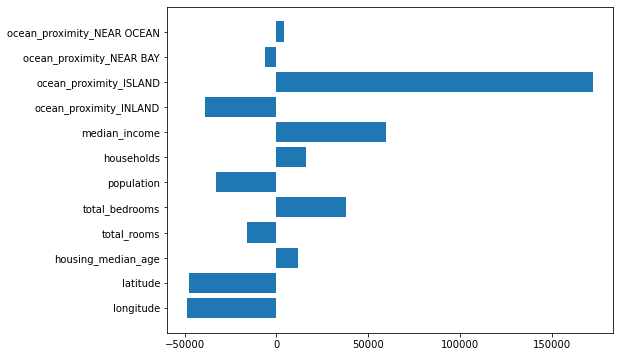

In [176]:
plt.figure(figsize = (8,6))
plt.barh(X_train.columns, reg_lasso.coef_)
plt.show()

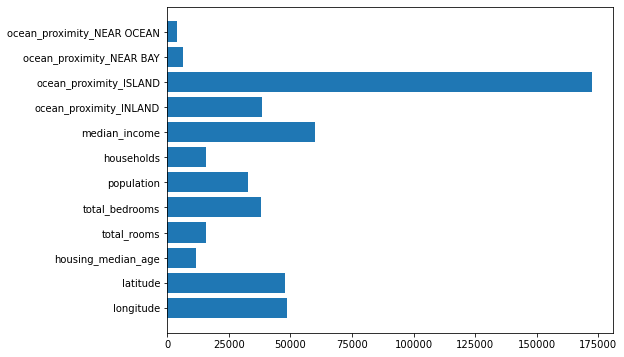

In [177]:
plt.figure(figsize = (8,6))
plt.barh(X_train.columns, np.abs(reg_lasso.coef_))
plt.show()